In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
from pathlib import Path
processed_data_path = Path().resolve().parent / 'processed_data'
figures_path = Path().resolve().parent / 'figures'
figures_path.mkdir(exist_ok=True)
common_path = Path().resolve().parent / 'common_scripts'
sys.path.insert(0, str(common_path))

## Fig 7


SIMPLIFIED MODEL RESULTS:

Fitted vs Noise correlation (from v vectors):
  Mean error:     -0.007199
  Std error:      0.154003
  RMSE:           0.154171
  Correlation:    0.9755

Fitted vs Phase correlation:
  Mean error:     +0.016655
  Std error:      0.095787
  RMSE:           0.097224
  Correlation:    0.9907

Noise correlation vs Phase correlation:
  Mean difference: +0.023853
  Std difference:  0.200513
  Correlation:     0.9617

NOTE: The DC approximation extracts r_AB that matches the PHASE correlation,
      not the instantaneous noise correlation. This is expected because
      the dephasing depends on integrated phases φ = ∫ξ(t)dt, not ξ(t) itself.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


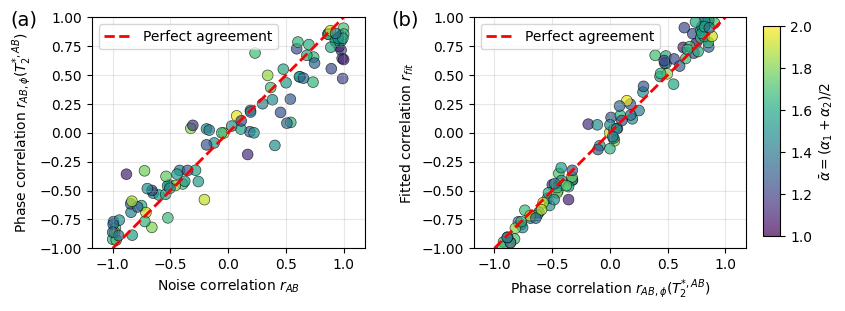

In [2]:
import pickle

with open('../processed_data/fig7/data_fig7.pkl', 'rb') as f:
    results_simple = pickle.load(f)


alpha_avg = (results_simple['alpha_1'] + results_simple['alpha_2']) / 2

# Main scatter plots: r12_true vs r12_fitted, and r12_phase vs r12_fitted
# Use GridSpec to maintain equal plot widths, colorbar outside
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8.5, 3))
# Reserve space on the right for colorbar (leaving ~15% of width)
fig.subplots_adjust(right=0.85)
gs = GridSpec(1, 2, figure=fig, width_ratios=[1, 1], wspace=0.4, 
              left=0.08, right=0.85)

# Plot 3: r12_true vs r12_phase
ax3 = fig.add_subplot(gs[0, 0])
scatter3 = ax3.scatter(results_simple['r12_true'], results_simple['r12_phase'], 
                      c=alpha_avg, s=60, alpha=0.7, 
                      cmap='viridis', edgecolors='black', linewidth=0.5,
                      vmin=1.0, vmax=2.0)
ax3.plot([-1, 1], [-1, 1], 'r--', linewidth=2, label='Perfect agreement')
ax3.set_xlabel(r'Noise correlation $r_{AB}$')
ax3.set_ylabel(r'Phase correlation $r_{AB,\phi}(T_{2}^{*,AB})$')
ax3.grid(True, alpha=0.3)
ax3.axis('equal')
ax3.set_xlim([-1, 1])
ax3.set_ylim([-1, 1])
ax3.legend(fontsize=10)

# Plot 2: r12_phase vs r12_fitted, colored by average α
ax2 = fig.add_subplot(gs[0, 1])
scatter2 = ax2.scatter(results_simple['r12_phase'], results_simple['r12_fitted'],
                      c=alpha_avg, s=60, alpha=0.7, 
                      cmap='viridis', edgecolors='black', linewidth=0.5,
                      vmin=1.0, vmax=2.0)
ax2.plot([-1, 1], [-1, 1], 'r--', linewidth=2, label='Perfect agreement')
ax2.set_ylabel(r'Fitted correlation $r_{fit}$')
ax2.set_xlabel(r'Phase correlation $r_{AB, \phi}(T_{2}^{*,AB})$')
ax2.grid(True, alpha=0.3)
ax2.axis('equal')
ax2.set_ylim([-1, 1])
ax2.set_xlim(-1, 1)
ax2.legend(fontsize=10)

# Add colorbar outside the GridSpec area on the right
cax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = plt.colorbar(scatter3, cax=cax)
cbar.set_label(r'$\bar{\alpha} = (\alpha_1 + \alpha_2)/2$')

# Add subplot annotation "a)" and "b)"
ax3.annotate('(a)', xy=(-0.3, 0.95), xycoords='axes fraction', fontsize=14, ha='left', va='bottom')
ax2.annotate('(b)', xy=(-.3, 0.95), xycoords='axes fraction', fontsize=14, ha='left', va='bottom')


# Statistics
error_true = results_simple['r12_fitted'] - results_simple['r12_true']
error_phase = results_simple['r12_fitted'] - results_simple['r12_phase']
error_true_phase = results_simple['r12_true'] - results_simple['r12_phase']

print(f"\n{'='*70}")
print("SIMPLIFIED MODEL RESULTS:")
print(f"{'='*70}")
print(f"\nFitted vs Noise correlation (from v vectors):")
print(f"  Mean error:     {np.mean(error_true):+.6f}")
print(f"  Std error:      {np.std(error_true):.6f}")
print(f"  RMSE:           {np.sqrt(np.mean(error_true**2)):.6f}")
print(f"  Correlation:    {np.corrcoef(results_simple['r12_fitted'], results_simple['r12_true'])[0,1]:.4f}")

print(f"\nFitted vs Phase correlation:")
print(f"  Mean error:     {np.mean(error_phase):+.6f}")
print(f"  Std error:      {np.std(error_phase):.6f}")
print(f"  RMSE:           {np.sqrt(np.mean(error_phase**2)):.6f}")
print(f"  Correlation:    {np.corrcoef(results_simple['r12_fitted'], results_simple['r12_phase'])[0,1]:.4f}")

print(f"\nNoise correlation vs Phase correlation:")
print(f"  Mean difference: {np.mean(error_true_phase):+.6f}")
print(f"  Std difference:  {np.std(error_true_phase):.6f}")
print(f"  Correlation:     {np.corrcoef(results_simple['r12_true'], results_simple['r12_phase'])[0,1]:.4f}")

print(f"\n{'='*70}")
print("NOTE: The DC approximation extracts r_AB that matches the PHASE correlation,")
print("      not the instantaneous noise correlation. This is expected because")
print("      the dephasing depends on integrated phases φ = ∫ξ(t)dt, not ξ(t) itself.")
print(f"{'='*70}")

plt.savefig(f'{figures_path}/app_fig7_r12DC.pdf', dpi=300, bbox_inches='tight')

## Fig 8

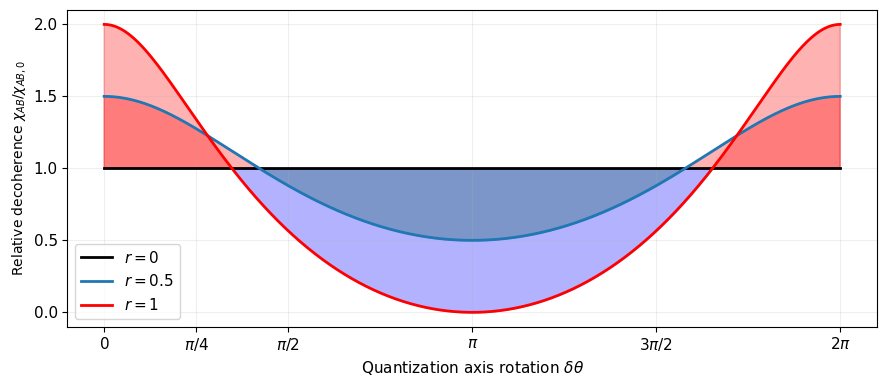

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 11
# Parameters
chi_A = 0.5
chi_B = 0.5

# Range of delta_theta from 0 to 2pi
delta_theta = np.linspace(0, 2 * np.pi, 500)

# Calculate values for r=0 and r=0.5
y_r0 = []
y_r05 = []

for r in [0, 0.5, 1]:
    # Gamma formula
    term1 = np.exp(-(chi_A + chi_B + 2*r*np.sqrt(chi_A*chi_B))) * np.cos(delta_theta/2)**2
    term2 = np.exp(-(chi_A + chi_B - 2*r*np.sqrt(chi_A*chi_B))) * np.sin(delta_theta/2)**2
    term12 = np.exp(-(chi_A + chi_B))
    Gamma = term1 + term2
    T212 = np.log(Gamma)
    T2 = np.log(term12)
    y = T212/T2
    if r == 0:
        y_r0 = y
    elif r == 0.5:
        y_r05 = y
    elif r == 1:
        y_r1 = y

plt.figure(figsize=(9, 4))

# Plot r=0 in black
plt.plot(delta_theta, y_r0, color='black', label=r"$r=0$", linewidth=2)

# Plot r=0.5
plt.plot(delta_theta, y_r05, label=r"$r=0.5$", linewidth=2)

plt.plot(delta_theta, y_r1, color = "red", label=r"$r=1$", linewidth=2)


# Fill between the curves: red when r=0.5 > r=0, blue when r=0.5 < r=0
mask_above = y_r05 > y_r0
mask_below = y_r05 < y_r0

# Fill red where r=0.5 is above r=0
if np.any(mask_above):
    plt.fill_between(delta_theta, y_r0, y_r05, where=mask_above, 
                     color='red', alpha=0.3, interpolate=True)

# Fill blue where r=0.5 is below r=0
if np.any(mask_below):
    plt.fill_between(delta_theta, y_r0, y_r05, where=mask_below, 
                     color='green', alpha=0.3, interpolate=True)

# Fill between r=1 and r=0: red when r=1 > r=0, blue when r=1 < r=0
mask_above_r1 = y_r1 > y_r0
mask_below_r1 = y_r1 < y_r0

# Fill red where r=1 is above r=0
if np.any(mask_above_r1):
    plt.fill_between(delta_theta, y_r0, y_r1, where=mask_above_r1, 
                     color='red', alpha=0.3, interpolate=True)

# Fill blue where r=1 is below r=0
if np.any(mask_below_r1):
    plt.fill_between(delta_theta, y_r0, y_r1, where=mask_below_r1, 
                     color='blue', alpha=0.3, interpolate=True)

plt.xlabel(r'Quantization axis rotation $\delta\theta$')
plt.ylabel(r'Relative decoherence $\chi_{AB}/\chi_{AB,0}$', fontsize=10)
plt.legend()
plt.grid(True, alpha=0.2)
plt.yticks([0,0.5,1,1.5,2])
# Set x-axis ticks to show π/2, π, 3π/2, 2π
plt.xticks([0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], 
           [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])

plt.tight_layout()
plt.savefig(f'{figures_path}/app_fig8_spatial_rot_theta.pdf', dpi=150)
plt.show()


## Fig 9

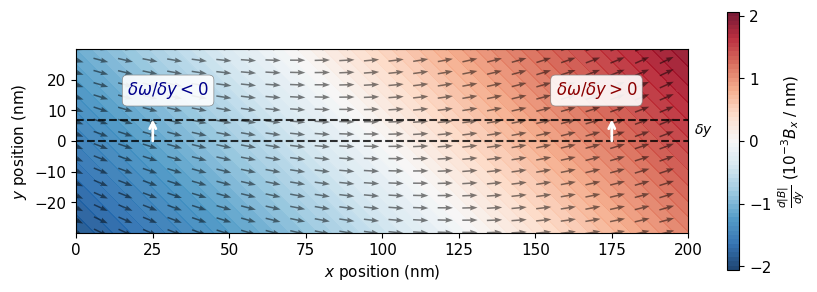

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- Publication Quality Settings ---
# These settings emulate LaTeX fonts without needing a local TeX installation


# --- Data Generation ---
# Grid setup
x_range = np.linspace(0, 200, 200) # High resolution for smooth contours
y_range = np.linspace(-50, 50, 200)
X, Y = np.meshgrid(x_range, y_range)

# Physics Parameters
bx = 10.0           # Strong longitudinal field
dby = 0.04          # Gradient strength
x0_plus_y0 = 100    # Sweet spot center parameter

# Calculate Fields
By = dby * (Y + X - x0_plus_y0)
Bx = np.full_like(By, bx)
B_mag = np.sqrt(Bx**2 + By**2)

# Calculate Gradient: d|B|/dy
# Formula: (By * dby) / |B|
dB_dy = (By * dby) / B_mag

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8.5, 3))

# 1. The Gradient Field (Color Contour)
# We find the max absolute value to center the colormap perfectly at 0 (white)
max_val = np.max(np.abs(dB_dy))/bx*1000
levels = np.linspace(-max_val, max_val, 60) # High number of levels for smooth gradient

# 'RdBu_r' is Red-Blue reversed (Blue=Negative, Red=Positive)
contour = ax.contourf(X, Y, 1000*dB_dy/bx, levels=levels, cmap='RdBu_r', alpha=0.9)

# 2. The Sweet Spot Line (dashed)
x_line = np.linspace(0, 200, 100)
y_line = 0 * np.ones_like(x_line)
ax.plot(x_line, y_line, 'k--', linewidth=1.5, alpha=0.8)

# 3. Field Vectors (Quiver)
# We must subsample the grid, otherwise arrows will be too dense
step = 8
U = Bx[::step, ::step] / B_mag[::step, ::step]
V = By[::step, ::step] / B_mag[::step, ::step]
X_q = X[::step, ::step]
Y_q = Y[::step, ::step]

ax.quiver(X_q, Y_q, U, V, color='black', pivot='mid', 
          scale=40, width=0.0025, headwidth=3.5, alpha=0.5)

# 4. Colorbar

# 5. Annotations (Clean boxes)
props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray', linewidth=0.5)

# Place labels in the negative (blue) and positive (red) regions
ax.text(30, 15, r'$\delta \omega/\delta y < 0$', fontsize=12, color='darkblue', bbox=props, ha='center')
ax.text(170, 15, r'$\delta \omega/\delta y > 0$', fontsize=12, color='darkred', bbox=props, ha='center')

# 6. Axis Labels and Title
ax.set_xlabel(r'$x$ position (nm)')
ax.set_ylabel(r'$y$ position (nm)')

# Limits and Legend
ax.set_xlim(0, 200)
ax.set_ylim(-30, 30)
ax.set_yticks([-20,-10, 0, 10,20])
cbar = plt.colorbar(contour, ax=ax, label=r"$\frac{d|B|}{dy}$ ($10^{-3} B_x$ / nm)", shrink=1)
cbar.ax.set_yticks([-2,-1,0,1,2])
ax.set_aspect('equal')
# Add another dashed line at y=5 nm, same x range
y_line_shift = 7 * np.ones_like(x_line)
ax.plot(x_line, y_line_shift, 'k--', linewidth=1.5, alpha=0.8)

# Add arrows at x=25 and x=175, from y=0 to y=5
arrow_props = dict(arrowstyle='->', color='white', linewidth=2, shrinkA=0, shrinkB=0)
ax.annotate('', xy=(25, 7), xytext=(25, 0), arrowprops=arrow_props)
ax.annotate('', xy=(175, 7), xytext=(175, 0), arrowprops=arrow_props)
# Add $\delta y$ text label outside of plot between dashed y=0 and y=7 nm lines, on the right edge
ax.text(202, 3.5, r"$\delta y$", fontsize=10, color='black', va='center', ha='left', rotation=0)
# Show/Save
# Note: tight_layout() is not needed when using constrained_layout=True in subplots()
plt.subplots_adjust(bottom=0.10, right=0.99, left = 0.09, top=0.96)
plt.savefig(f'{figures_path}/app_fig9_spatial_sensitivity_pub.pdf', dpi=150)

plt.show()

## Fig 10

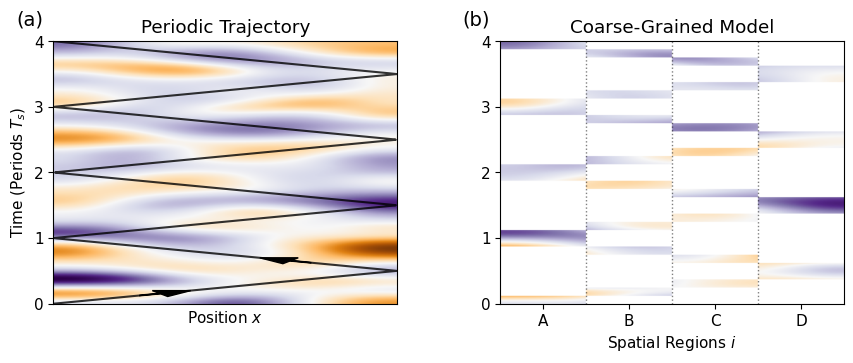

In [5]:
# Misc Figures: Coarse-Grained Model Illustrations

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def create_shuttling_illustration_v2():
    # ---------------------------------------------------------
    # Parameters
    # ---------------------------------------------------------
    n_space = 200        # Spatial resolution
    n_periods = 4.0      # Number of periods to illustrate
    points_per_period = 200
    n_time = int(n_periods * points_per_period) # Total time resolution
    n_buckets = 4        # Number of coarse-grained regions (M)
    
    # ---------------------------------------------------------
    # 1. Generate Spatially Varying Noise (The "Sheet")
    # ---------------------------------------------------------
    np.random.seed(42) 
    
    # Create raw random 
    # 
    #  for the extended time window
    noise_raw = np.random.randn(n_time, n_space)
    
    # Apply Gaussian filter to create correlation "blobs"
    sigma_time = 20
    sigma_space = 30 
    noise_smooth = gaussian_filter(noise_raw, sigma=(sigma_time, sigma_space))
    
    # Normalize noise to [-1, 1] for the PuOr colormap
    # This ensures the colormap is centered correctly
    noise_smooth = 2 * (noise_smooth - noise_smooth.min()) / (noise_smooth.max() - noise_smooth.min()) - 1

    # ---------------------------------------------------------
    # 2. Define Periodic Trajectory
    # ---------------------------------------------------------
    # Time axis from 0 to n_periods
    t_axis = np.linspace(0, n_periods, n_time)
    
    # Periodic triangular wave for position x(t). 
    # (t % 1) gives the time within the current period, creating the repetition.
    trajectory_x = 1 - np.abs(2 * (t_axis % 1) - 1)
    
    # ---------------------------------------------------------
    # 3. Create the Mask for the Coarse-Grained Model
    # ---------------------------------------------------------
    # Initialize mask with zeros
    mask_matrix = np.zeros((n_time, n_space))
    
    # Calculate the width of each bucket in spatial indices
    bucket_width_idx = n_space / n_buckets
    
    for i in range(n_time):
        pos = trajectory_x[i]
        
        # Determine which bucket index (0 to n_buckets-1) the position falls into
        bucket_idx = int(pos * n_buckets)
        if bucket_idx >= n_buckets: bucket_idx = n_buckets - 1
            
        # Determine the spatial columns corresponding to this bucket
        col_start = int(bucket_idx * bucket_width_idx)
        col_end = int((bucket_idx + 1) * bucket_width_idx)
        
        # Fill the mask for the active bucket at this time step
        mask_matrix[i, col_start:col_end] = 1.0

    # Apply the mask: Set values outside the active bucket to NaN (for transparency/white)
    masked_noise_nan = noise_smooth.copy()
    masked_noise_nan[mask_matrix == 0] = np.nan

    # ---------------------------------------------------------
    # 4. Plotting
    # ---------------------------------------------------------
    fig, axes = plt.subplots(1, 2, figsize=(8.5, 3.5), gridspec_kw={'width_ratios': [1, 1]})
    
    plt.subplots_adjust(wspace=0.3, bottom=0.15, top=0.9, right = 0.99, left = 0.06)
    # --- Plot A: Continuous Model ---
    ax0 = axes[0]
    # Plot the full continuous noise
    im0 = ax0.imshow(noise_smooth, aspect='auto', origin='lower', 
                     cmap='PuOr', extent=[0, 1, 0, n_periods], vmin=-1, vmax=1)
    
    # Plot the periodic trajectory
    ax0.plot(trajectory_x, t_axis, color='black', linewidth=1.5, linestyle='-', alpha=0.8)
    
    # Add illustrative arrows for the first period
    ax0.arrow(0.25, 0.125, 0.06, 0.03, head_width=0.1, head_length=0.1, fc='black', ec='black', zorder=10)
    ax0.arrow(0.75, 0.625, -0.06, 0.03, head_width=0.1, head_length=0.1, fc='black', ec='black', zorder=10)

    ax0.set_title("Periodic Trajectory")
    ax0.set_xlabel("Position $x$")
    ax0.set_ylabel("Time (Periods $T_s$)")
    ax0.set_xticks([])
    # Show tick marks for each period
    ax0.set_yticks(np.arange(0, n_periods + 0.1, 1))
    
    # --- Plot B: Coarse-Grained Buckets (Masked) ---
    ax1 = axes[1]
    
    # Configure colormap to show NaNs as white
    cmap = plt.cm.PuOr.copy()
    cmap.set_bad(color='white') 
    
    # Plot the masked noise
    ax1.imshow(masked_noise_nan, aspect='auto', origin='lower', 
               cmap=cmap, extent=[0, 1, 0, n_periods], vmin=-1, vmax=1)
    
    # Add vertical grid lines to separate buckets
    for b in range(1, n_buckets):
        ax1.axvline(x=b/n_buckets, color='black', linestyle=':', linewidth=1, alpha=0.5)
        
    ax1.set_title("Coarse-Grained Model")
    ax1.set_xlabel("Spatial Regions $i$")
    ax1.set_yticks(np.arange(0, n_periods + 0.1, 1))
    # ax1.set_yticklabels([]) # Uncomment to hide y-labels on the right plot
    
    # Label the x-axis with Bucket numbers at their centers
    # The extent is [0, 1], so we calculate centers in that coordinates
    bucket_centers = (np.arange(n_buckets) + 0.5) / n_buckets
    ax1.set_xticks(bucket_centers)
    ax1.set_xticklabels(["A", "B", "C", "D"])

    labels = ['(a)', '(b)']
    labels = ['(a)', '(b)']
 
    ax0.text(-0.03, 1.12, labels[0], transform=ax0.transAxes, 
                  fontsize=14, va='top', ha='right')
    ax1.text(-0.03, 1.12, labels[1], transform=ax1.transAxes, 
                  fontsize=14, va='top', ha='right')


    # plt.savefig('shuttling_model_illustration_v2.png', dpi=300)
    plt.savefig(f'{figures_path}/app_fig10_shuttling_model_illustration.pdf')
    
    


if __name__ == "__main__":
    create_shuttling_illustration_v2()

## Fig 11 12


In [6]:
# Load results from JSON file
import json
from pathlib import Path

# Load results.json from the current directory
results_file = Path('../processed_data/fig11_12/results.json')
if results_file.exists():
    with open(results_file, 'r') as f:
        results = json.load(f)
    
    # Convert lists back to numpy arrays for easier manipulation
    for key in results:
        if isinstance(results[key], list) and len(results[key]) > 0:
            if isinstance(results[key][0], list):
                # Nested lists (like T2_per_bucket, alpha_per_bucket)
                results[key] = [np.array(item) for item in results[key]]
            else:
                # Simple lists
                results[key] = np.array(results[key])
    
    print(f"✓ Loaded results from {results_file}")
    print(f"  Number of configurations: {len(results['T2_continuous'])}")
else:
    print(f"⚠ Warning: {results_file} not found. Run the simulation first (Cell 7).")


PERIOD_PHYSICAL = results['PERIOD_PHYSICAL']
DISTANCE_NM = results['DISTANCE_NM']
N_BUCKETS = results['N_BUCKETS']
N_SOURCES = results['N_SOURCES']
N_CONFIGURATIONS = results['N_CONFIGURATIONS']
N_REALIZATIONS = results['N_REALIZATIONS']
MAX_REPETITIONS = results['MAX_REPETITIONS']
STEPS_PER_PERIOD = results['STEPS_PER_PERIOD']
DT_SIM = results['DT_SIM']

✓ Loaded results from ../processed_data/fig11_12/results.json
  Number of configurations: 10


<>:125: SyntaxWarning: invalid escape sequence '\l'
<>:126: SyntaxWarning: invalid escape sequence '\l'
<>:125: SyntaxWarning: invalid escape sequence '\l'
<>:126: SyntaxWarning: invalid escape sequence '\l'
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_95920/4225674676.py:125: SyntaxWarning: invalid escape sequence '\l'
  ax10.set_xlabel("True $\lambda_c$ (nm)", fontsize=11)
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_95920/4225674676.py:126: SyntaxWarning: invalid escape sequence '\l'
  ax10.set_ylabel("Fitted $\lambda_c$ (DC Model) (nm)", fontsize=11)


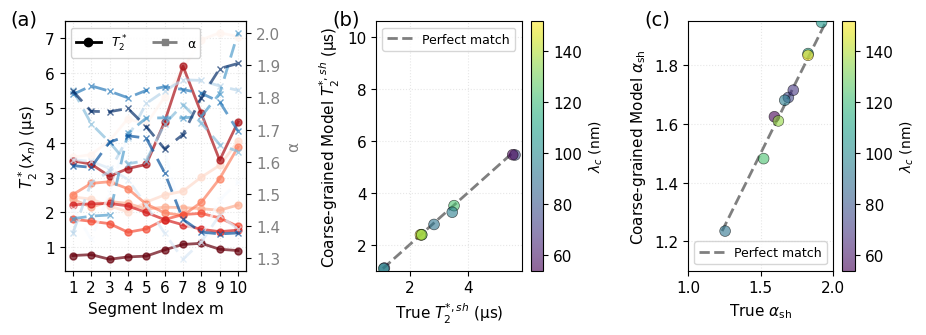

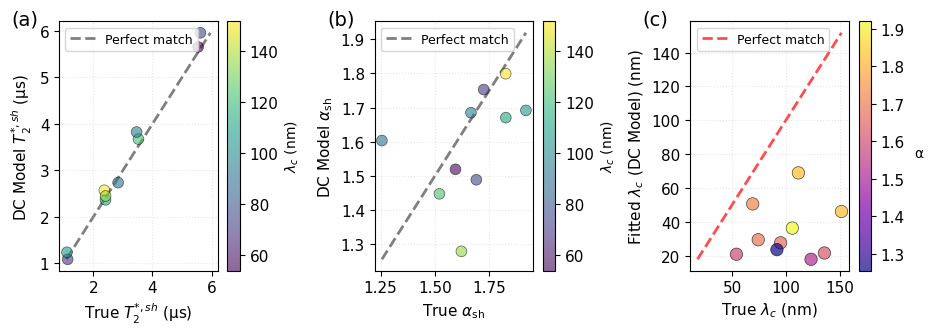


Correlation Length Recovery Statistics:
Mean absolute error: 0.3350 (67.01 nm)
Mean absolute relative error: 63.73%
Root mean square error (RMSE): 0.3697 (73.94 nm)
Correlation coefficient: 0.1216


In [7]:


T2_cont_arr = np.array(results['T2_continuous']) * PERIOD_PHYSICAL
T2_bucket_arr = np.array(results['T2_bucket']) * PERIOD_PHYSICAL
T2_dc_arr = np.array(results['T2_dc']) * PERIOD_PHYSICAL
alpha_cont_arr = np.array(results['alpha_continuous'])
alpha_bucket_arr = np.array(results['alpha_bucket'])
alpha_dc_arr = np.array(results['alpha_dc'])
xc_arr = np.array(results['xc'])
xc_fitted_dc_arr = np.array(results['xc_fitted_dc'])

# Convert xc to nanometers (DISTANCE = 1.0 corresponds to DISTANCE_NM = 200 nm)
xc_arr_nm = xc_arr * DISTANCE_NM
xc_fitted_dc_arr_nm = xc_fitted_dc_arr * DISTANCE_NM


fig1, axes1 = plt.subplots(1, 3, figsize=(9.5, 3.5))
plt.subplots_adjust(wspace=0.0)


ax00 = axes1[0]
if len(results['T2_per_bucket']) > 0:
    bucket_indices = np.arange(N_BUCKETS)
    n_configs = len(results['T2_per_bucket'])
    
    # Get color map for different configurations
    colors = plt.cm.Reds(np.linspace(0, 1, min(n_configs, 8)))  # Use up to 10 colors
    colors_alpha = plt.cm.Blues(np.linspace(0, 1, min(n_configs, 8)))  # Use up to 10 colors

    # Plot T2 (solid lines) for each configuration
    lines_T2 = []
    for i, (T2_buckets, color) in enumerate(zip(results['T2_per_bucket'], colors)):
        line = ax00.plot(bucket_indices, T2_buckets, 'o-', 
                        color=color, linewidth=2, markersize=5, 
                        alpha=0.7, zorder=3, label=rf'$T_2^*$ (config {i+1})' if i < 3 else '')
        lines_T2.extend(line)
    
    # Plot alpha (dashed lines) on twin axis for each configuration
    ax00_twin = ax00.twinx()
    lines_alpha = []
    for i, (alpha_buckets, color) in enumerate(zip(results['alpha_per_bucket'], colors_alpha)):
        line = ax00_twin.plot(bucket_indices, alpha_buckets, 'x--', 
                             color=color, linewidth=2, markersize=4, 
                             dashes=(5, 3), alpha=0.7, zorder=2, 
                             label=f'α (config {i+1})' if i < 3 else '')
        lines_alpha.extend(line)
    
    ax00.set_xlabel("Segment Index m", fontsize=11)
    ax00.set_ylabel(r"$T_2^*(x_n)$ (µs)", fontsize=11, color='black')
    ax00_twin.set_ylabel("α", fontsize=11, color='gray')
    ax00.set_xticks(bucket_indices)
    ax00.set_xticklabels(bucket_indices+1)
    ax00.grid(True, alpha=0.3, linestyle=':', zorder=0)
    ax00.tick_params(axis='y', labelcolor='black')
    ax00_twin.tick_params(axis='y', labelcolor='gray')
    
    # Add simple legend showing T2* and α line styles
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='black', linewidth=2, linestyle='-', marker='o', label=r'$T_2^*$', markersize=6),
        Line2D([0], [0], color='gray', linewidth=2, linestyle='--', marker='s', label='α', markersize=5)
    ]
    ax00.legend(handles=legend_elements, loc='upper left', fontsize=9, framealpha=0.9, ncol=2)
else:
    ax00.text(0.5, 0.5, 'No per-bucket data available', 
             ha='center', va='center', transform=ax00.transAxes)



ax01 = axes1[1]
scatter01 = ax01.scatter(T2_cont_arr, T2_bucket_arr, 
                         c=xc_arr_nm, s=60, alpha=0.6, 
                         cmap='viridis', edgecolors='black', linewidth=0.5, zorder=3)
min_T2_01 = min(T2_cont_arr.min(), T2_bucket_arr.min())
max_T2_01 = max(T2_cont_arr.max(), T2_bucket_arr.max())
ax01.plot([min_T2_01, max_T2_01], [min_T2_01, max_T2_01], 'k--', 
         linewidth=2, label='Perfect match', alpha=0.5, zorder=1)
ax01.set_xlabel(r"True $T_{2}^{*,sh}$ (µs)", fontsize=11)
ax01.set_ylabel(r"Coarse-grained Model $T_{2}^{*,sh}$ (µs)", fontsize=11)
ax01.legend(fontsize=9, loc="upper left")
ax01.grid(True, alpha=0.3, linestyle=':')
cbar01 = plt.colorbar(scatter01, ax=ax01)
cbar01.set_label(r'$\lambda_c$ (nm)', fontsize=10)
ax01.set_ylim(1,10.6)


ax11 = axes1[2]
scatter11 = ax11.scatter(alpha_cont_arr, alpha_bucket_arr, 
                         c=xc_arr_nm, s=60, alpha=0.6, 
                         cmap='viridis', edgecolors='black', linewidth=0.5, zorder=3)
min_alpha_11 = min(alpha_cont_arr.min(), alpha_bucket_arr.min())
max_alpha_11 = max(alpha_cont_arr.max(), alpha_bucket_arr.max())
ax11.plot([min_alpha_11, max_alpha_11], [min_alpha_11, max_alpha_11], 'k--', 
         linewidth=2, label='Perfect match', alpha=0.5, zorder=1)
ax11.set_xlabel(r"True $\alpha_\mathrm{sh}$", fontsize=11)
ax11.set_ylabel(r"Coarse-grained Model $\alpha_\mathrm{sh}$", fontsize=11)
ax11.legend(fontsize=9)
ax11.grid(True, alpha=0.3, linestyle=':')
cbar11 = plt.colorbar(scatter11, ax=ax11)
cbar11.set_label(r'$\lambda_c$ (nm)', fontsize=10)
ax11.set_ylim(1.1,1.95)
# Add subplot label
ax11.set_xlim(1,2)
labels = ['(a)', '(b)', '(c)']
for ax, label in zip([ax00, ax01, ax11], labels):
    ax.text(-0.3, 1.05, label,  transform=ax.transAxes, fontsize=14,
          verticalalignment='top', horizontalalignment='left')

plt.tight_layout()
plt.savefig(f'{figures_path}/app_fig11_benchmark_bucket_model.pdf', dpi=300, bbox_inches='tight')
plt.show()


fig2, axes2 = plt.subplots(1, 3, figsize=(9.5, 3.5))
plt.subplots_adjust(wspace=0.01)


ax10 = axes2[2]
alpha_cont_arr = alpha_cont_arr.clip(1,2)
scatter_xc = ax10.scatter(xc_arr_nm, xc_fitted_dc_arr_nm, 
                         c=alpha_cont_arr, s=80, alpha=0.7, 
                         cmap='plasma', edgecolors='black', linewidth=0.5, zorder=3)
min_xc = min(xc_arr_nm.min(), xc_fitted_dc_arr_nm.min())
max_xc = max(xc_arr_nm.max(), xc_fitted_dc_arr_nm.max())
ax10.plot([min_xc, max_xc], [min_xc, max_xc], 'r--', linewidth=2, 
         label='Perfect match', alpha=0.7, zorder=1)
ax10.set_xlabel("True $\lambda_c$ (nm)", fontsize=11)
ax10.set_ylabel("Fitted $\lambda_c$ (DC Model) (nm)", fontsize=11)
ax10.legend(fontsize=9, loc='upper left')
ax10.grid(True, alpha=0.3, linestyle=':')
cbar_xc = plt.colorbar(scatter_xc, ax=ax10)
cbar_xc.set_label('α', fontsize=10, rotation=0, labelpad=10)



ax02 = axes2[0]
scatter02 = ax02.scatter(T2_cont_arr, T2_dc_arr, 
                         c=xc_arr_nm, s=60, alpha=0.6, 
                         cmap='viridis', edgecolors='black', linewidth=0.5, zorder=3)
min_T2_02 = min(T2_cont_arr.min(), T2_dc_arr.min())
max_T2_02 = max(T2_cont_arr.max(), T2_dc_arr.max())
ax02.plot([min_T2_02, max_T2_02], [min_T2_02, max_T2_02], 'k--', 
         linewidth=2, label='Perfect match', alpha=0.5, zorder=1)
ax02.set_xlabel(r"True $T_{2}^{*,sh}$ (µs)", fontsize=11)
ax02.set_ylabel(r"DC Model $T_{2}^{*,sh}$ (µs)", fontsize=11)
ax02.legend(fontsize=9)
ax02.grid(True, alpha=0.3, linestyle=':')
cbar02 = plt.colorbar(scatter02, ax=ax02)   
cbar02.set_label(r'$\lambda_c$ (nm)', fontsize=10)    

# Add subplot label


ax12 = axes2[1]
scatter12 = ax12.scatter(alpha_cont_arr, alpha_dc_arr, 
                         c=xc_arr_nm, s=60, alpha=0.6, 
                         cmap='viridis', edgecolors='black', linewidth=0.5, zorder=3)
min_alpha_12 = min(alpha_cont_arr.min(), alpha_dc_arr.min())
max_alpha_12 = max(alpha_cont_arr.max(), alpha_dc_arr.max())
ax12.plot([min_alpha_12, max_alpha_12], [min_alpha_12, max_alpha_12], 'k--', 
         linewidth=2, label='Perfect match', alpha=0.5, zorder=1)
ax12.set_xlabel(r"True $\alpha_\mathrm{sh}$", fontsize=11)
ax12.set_ylabel(r"DC Model $\alpha_\mathrm{sh}$", fontsize=11)
ax12.legend(fontsize=9)
ax12.grid(True, alpha=0.3, linestyle=':')
cbar12 = plt.colorbar(scatter12, ax=ax12)
cbar12.set_label(r'$\lambda_c$ (nm)', fontsize=10)

labels = ['(a)', '(b)', '(c)']
for ax, label in zip([ax02,ax12,ax10], labels):
    ax.text(-0.3, 1.05, label,  transform=ax.transAxes, fontsize=14,
          verticalalignment='top', horizontalalignment='left')


plt.tight_layout()
plt.savefig(f'{figures_path}/app_fig12_benchmark_dc_model.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print(f"\n{'='*60}")
print(f"Correlation Length Recovery Statistics:")
print(f"{'='*60}")
xc_error = xc_fitted_dc_arr - xc_arr
xc_error_nm = xc_error * DISTANCE_NM  # Convert error to nm
xc_relative_error = xc_error / xc_arr * 100
mean_abs_error = np.mean(np.abs(xc_error))
mean_abs_error_nm = mean_abs_error * DISTANCE_NM
mean_abs_rel_error = np.mean(np.abs(xc_relative_error))
rmse = np.sqrt(np.mean(xc_error**2))
rmse_nm = rmse * DISTANCE_NM
print(f"Mean absolute error: {mean_abs_error:.4f} ({mean_abs_error_nm:.2f} nm)")
print(f"Mean absolute relative error: {mean_abs_rel_error:.2f}%")
print(f"Root mean square error (RMSE): {rmse:.4f} ({rmse_nm:.2f} nm)")
print(f"Correlation coefficient: {np.corrcoef(xc_arr, xc_fitted_dc_arr)[0,1]:.4f}")



## Fig 13

Plot shuttling_filter_3bucket_W_interference.png saved.


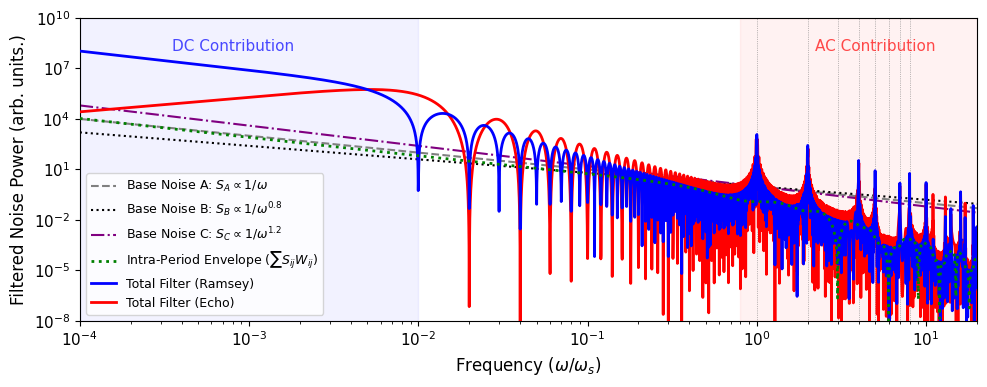

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define physical parameters for the simulation ---
N = 100      # Number of shuttling cycles (MUST be even)
M = 3        # Number of buckets (A, B, C)
Ts = 1.0     # Period of one cycle (e.g., in nanoseconds)

# Correlation coefficients
r_AB = 0.4
r_AC = 0.2 # Negative correlation for interesting interference
r_BC = 0.4

# Derived parameters
ws = 2 * np.pi / Ts       # Shuttling frequency (rad/ns)
num_segments = 2 * M      # Sequence {A,B,C,C,B,A} -> 6 segments
dt = Ts / num_segments    # Time spent in one segment (Delta t)
T_total = N * Ts          # Total sequence time (tau)

# --- 2. Define the filter and noise functions ---

# Unnormalized sinc function: sin(x)/x
def sinc(x):
    return np.divide(np.sin(x), x, out=np.ones_like(x), where=x!=0)

# a) The base noise spectrum
def noise_spectrum(omega, alpha=1.0):
    return 1 / ((omega + 1e-18)**alpha)

# b) Single-segment filter (Ramsey filter for duration dt)
def single_segment_filter(omega, dt):
    return (dt**2) * (sinc(omega * dt / 2)**2)

# c) Ramsey Comb Filter (Periodic shuttling for N periods)
def G_Ramsey(omega, N, Ts):
    num = np.sin(N * omega * Ts / 2)**2
    den = np.sin(omega * Ts / 2)**2
    return np.divide(num, den, out=np.full_like(omega, N**2), where=den!=0)

# d) Echo Comb Filter (Periodic shuttling with 1 echo pulse at N/2)
def G_Echo(omega, N, Ts):
    num = 4 * (np.sin(N * omega * Ts / 4)**4)
    den = np.sin(omega * Ts / 2)**2
    return np.divide(num, den, out=np.zeros_like(omega), where=den!=0)

# e) Intra-period structure factors K_ij for sequence {A, B, C, C, B, A}
# m = {1, 2, 3, 4, 5, 6} -> k_m = {A, B, C, C, B, A}
# dt_diff = (m-p)*dt
def K_AA(omega, dt): # A at m={1,6}
    return 2 + 2 * np.cos(5 * omega * dt) # (6-1) = 5

def K_BB(omega, dt): # B at m={2,5}
    return 2 + 2 * np.cos(3 * omega * dt) # (5-2) = 3

def K_CC(omega, dt): # C at m={3,4}
    return 2 + 2 * np.cos(1 * omega * dt) # (4-3) = 1

def K_AB(omega, dt): # A at {1,6}, B at {2,5}
    # Pairs (1,2) -> -1dt, (1,5) -> -4dt, (6,2) -> 4dt, (6,5) -> 1dt
    return 2 * np.cos(1 * omega * dt) + 2 * np.cos(4 * omega * dt)

def K_AC(omega, dt): # A at {1,6}, C at {3,4}
    # Pairs (1,3) -> -2dt, (1,4) -> -3dt, (6,3) -> 3dt, (6,4) -> 2dt
    return 2 * np.cos(2 * omega * dt) + 2 * np.cos(3 * omega * dt)

def K_BC(omega, dt): # B at {2,5}, C at {3,4}
    # Pairs (2,3) -> -1dt, (2,4) -> -2dt, (5,3) -> 2dt, (5,4) -> 1dt
    return 2 * np.cos(1 * omega * dt) + 2 * np.cos(2 * omega * dt)

# --- 3. Set up frequency axis and calculate filters ---

# Frequency axis (logarithmic scale)
omega = np.logspace(-4, 2, 5000) * ws

# Calculate base noise spectra
S_A = noise_spectrum(omega, 1.0)
S_B = noise_spectrum(omega, 0.8)
S_C = noise_spectrum(omega, 1.2) # New spectrum

# Normalize noise spectra by their values at ws
S_A /= noise_spectrum(np.array([ws]), 1.0)
S_B /= noise_spectrum(np.array([ws]), 0.8)
S_C /= noise_spectrum(np.array([ws]), 1.2)

# Calculate K_ij structure factors
Kaa = K_AA(omega, dt)
Kbb = K_BB(omega, dt)
Kcc = K_CC(omega, dt) # New
Kab = K_AB(omega, dt)
Kac = K_AC(omega, dt) # New
Kbc = K_BC(omega, dt) # New

# Calculate the "Effective Spatiotemporal Spectrum" (sum over i,j of S_ij * K_ij)
# S_eff = S_A*K_AA + S_B*K_BB + S_C*K_CC + 2*r_AB*sqrt(S_A*S_B)*K_AB + 2*r_AC*sqrt(S_A*S_C)*K_AC + 2*r_BC*sqrt(S_B*S_C)*K_BC
S_eff_sum_K = (S_A * Kaa) + (S_B * Kbb) + (S_C * Kcc) + \
              (2 * r_AB * np.sqrt(S_A * S_B) * Kab) + \
              (2 * r_AC * np.sqrt(S_A * S_C) * Kac) + \
              (2 * r_BC * np.sqrt(S_B * S_C) * Kbc)

# Get the other filters
F1_filter = single_segment_filter(omega, dt)
G_R_comb = G_Ramsey(omega, N, Ts)
G_E_comb = G_Echo(omega, N, Ts)

# Calculate the total intra-period spectrum (S_eff_sum_K * F1_filter)
# This is the sum S_ij * W_ij
Total_W_Spectrum = S_eff_sum_K * F1_filter

# Calculate the TOTAL filtered spectra
Total_Filter_Ramsey = Total_W_Spectrum * G_R_comb
Total_Filter_Echo = Total_W_Spectrum * G_E_comb


# --- 4. Plot the results on a single figure ---

fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# --- Mark DC and AC regions ---
ax.axvspan(omega[0]/ws, 0.01, color='blue', alpha=0.05, zorder=0)
ax.text(1e-4*8, 2*1e8, 'DC Contribution', ha='center', va='center', fontsize=11, color='blue', alpha=0.7)
ax.axvspan(0.8, omega[-1]/ws, color='red', alpha=0.05, zorder=0)
ax.text(5, 2*1e8, 'AC Contribution', ha='center', va='center', fontsize=11, color='red', alpha=0.7)

# Plot the base noise spectra
ax.plot(omega / ws, S_A, color='gray', lw=1.5, ls='--', 
        label=r'Base Noise A: $S_A \propto 1/\omega$')
ax.plot(omega / ws, S_B, color='black', lw=1.5, ls=':', 
        label=r'Base Noise B: $S_B \propto 1/\omega^{0.8}$')
ax.plot(omega / ws, S_C, color='purple', lw=1.5, ls='-.', 
        label=r'Base Noise C: $S_C \propto 1/\omega^{1.2}$') # New base noise

# Plot the total intra-period W_ij contribution
ax.plot(omega / ws, Total_W_Spectrum, color='green', lw=2, ls=':', 
        label=r'Intra-Period Envelope ($\sum S_{ij} W_{ij}$)', zorder=25)

# Plot the total Ramsey-filtered noise
ax.plot(omega / ws, Total_Filter_Ramsey, color='blue', lw=2, 
        label=r'Total Filter (Ramsey)', zorder=10)

# Plot the total Echo-filtered noise
ax.plot(omega / ws, Total_Filter_Echo, color='red', lw=2, 
        label=r'Total Filter (Echo)', zorder=9)

# Formatting the plot
ax.set_xlabel(r'Frequency ($\omega / \omega_s$)', fontsize=12)
ax.set_ylabel("Filtered Noise Power (arb. units.)", fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-4, 2*1e1)
ax.set_ylim(1e-8, 1e10) # Adjusted ylim
ax.legend(fontsize=9, loc='lower left',ncol=1) # Adjusted font size to fit

# Add vertical lines for harmonics
for k in range(1, int(1.5*num_segments)): # Plot more harmonics relevant to K_ij's
    ax.axvline(k, color='gray', ls=':', lw=0.5, zorder=0)

plt.tight_layout()
plt.savefig(f"{figures_path}/app_fig13shuttling_filter_3bucket_W_interference.pdf")

print("Plot shuttling_filter_3bucket_W_interference.png saved.")

## Fig 14

<>:82: SyntaxWarning: invalid escape sequence '\D'
<>:97: SyntaxWarning: invalid escape sequence '\s'
<>:82: SyntaxWarning: invalid escape sequence '\D'
<>:97: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_95920/371110755.py:82: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_ylabel('Detuning $\Delta(x)$ (arb. units)')
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_95920/371110755.py:97: SyntaxWarning: invalid escape sequence '\s'
  ax2.annotate('Periodic Trajectory\n$x(t) \sim \cos(\omega_s t)$', xy=(0.5, 1.), xytext=(0.5, 1.2), ha='center', fontsize=10, color='#555')


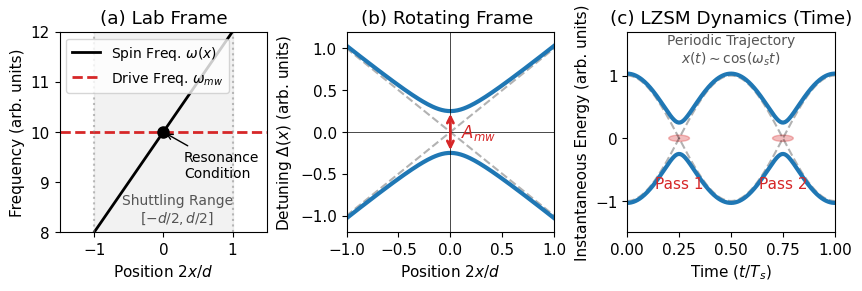

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def create_step_by_step_lzsm():
    # ---------------------------------------------------------
    # Parameters
    # ---------------------------------------------------------
    # Space domain
    x = np.linspace(-1.5, 1.5, 200)
    
    # Lab Frame
    omega_bar = 10.0 # Average freq (GHz approx)
    gradient = 2.0   # Gradient slope
    omega_z = omega_bar + gradient * x # Linear Zeeman
    omega_mw = omega_bar # Resonant drive
    
    # Rotating Frame
    Delta_x = gradient * x # Detuning vs position
    Ax = 0.5 # Rabi frequency (Gap)
    
    # Dressed energies vs Position (Static Picture)
    E_dressed_pos = np.sqrt(Delta_x**2 + Ax**2) / 2
    E_dressed_neg = -np.sqrt(Delta_x**2 + Ax**2) / 2
    
    # Time Domain (LZSM Dynamics)
    t = np.linspace(0, 1, 300) # One period
    x_t = 1.0 * np.cos(2 * np.pi * t) # Periodic trajectory x(t)
    Delta_t = gradient * x_t # Detuning vs time
    E_lzsm_pos = np.sqrt(Delta_t**2 + Ax**2) / 2
    E_lzsm_neg = -np.sqrt(Delta_t**2 + Ax**2) / 2
    
    # ---------------------------------------------------------
    # Plotting
    # ---------------------------------------------------------
    fig, axes = plt.subplots(1, 3, figsize=(8.5, 2.8), constrained_layout=True)
    
    # --- Panel 1: Lab Frame (Spatial) ---
    ax0 = axes[0]
    # Zeeman Splitting
    ax0.plot(x, omega_z, 'k-', linewidth=2, label=r'Spin Freq. $\omega(x)$')
    # Drive Frequency
    ax0.axhline(omega_mw, color='#d62728', linestyle='--', linewidth=2, label=r'Drive Freq. $\omega_{mw}$')
    
    # Shuttling Range
    ax0.axvline(-1, color='gray', linestyle=':', alpha=0.5)
    ax0.axvline(1, color='gray', linestyle=':', alpha=0.5)
    ax0.fill_betweenx([8, 12], -1, 1, color='gray', alpha=0.1)
    ax0.text(0.2, 8.2, 'Shuttling Range\n$[-d/2, d/2]$', ha='center', fontsize=10, color='#555')
    
    # Annotate Resonance
    ax0.plot(0, omega_bar, 'ko', markersize=8)
    ax0.annotate('Resonance\nCondition', xy=(0, omega_bar), xytext=(0.3, 9.1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
    
    ax0.set_title('(a) Lab Frame')
    ax0.set_xlabel('Position $2x/d$')
    ax0.set_ylabel('Frequency (arb. units)')
    ax0.legend(loc='upper left', frameon=True, fontsize=10)
    ax0.set_ylim(8, 12)
    ax0.set_xlim(-1.5, 1.5)

    # --- Panel 2: Rotating Frame (Spatial) ---
    ax1 = axes[1]
    # Diabatic (No Coupling) - Dashed
    ax1.plot(x, Delta_x/2, 'k--', alpha=0.3)
    ax1.plot(x, -Delta_x/2, 'k--', alpha=0.3, label='Uncoupled')
    
    # Dressed (Coupled) - Solid
    ax1.plot(x, E_dressed_pos, color='#1f77b4', linewidth=3, label='Dressed (+)')
    ax1.plot(x, E_dressed_neg, color='#1f77b4', linewidth=3, label='Dressed (-)')
    
    # Show Gap
    ax1.annotate('', xy=(0, Ax/2), xytext=(0, -Ax/2),
                 arrowprops=dict(arrowstyle='<->', color='#d62728', lw=2))
    ax1.text(0.1, 0, r'$A_{mw}$', color='#d62728', va='center', fontsize=12, fontweight='bold')
    
    ax1.axhline(0, color='black', linewidth=0.5)
    ax1.axvline(0, color='black', linewidth=0.5)
    
    ax1.set_title('(b) Rotating Frame ')
    ax1.set_xlabel('Position $2x/d$')
    ax1.set_ylabel('Detuning $\Delta(x)$ (arb. units)')
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1.2, 1.2)

    # --- Panel 3: LZSM (Time Domain) ---
    ax2 = axes[2]
    # Diabatic
    ax2.plot(t, Delta_t/2, 'k--', alpha=0.3)
    ax2.plot(t, -Delta_t/2, 'k--', alpha=0.3)
    
    # Dressed
    ax2.plot(t, E_lzsm_pos, color='#1f77b4', linewidth=3)
    ax2.plot(t, E_lzsm_neg, color='#1f77b4', linewidth=3)
    
    # Add trajectory visual
    ax2.annotate('Periodic Trajectory\n$x(t) \sim \cos(\omega_s t)$', xy=(0.5, 1.), xytext=(0.5, 1.2), ha='center', fontsize=10, color='#555')
    
    # Highlight crossings
    for cross_t in [0.25, 0.75]:
        ax2.add_patch(plt.Circle((cross_t, 0), 0.05, color='#d62728', alpha=0.3))
        
    ax2.text(0.25, -0.8, 'Pass 1', ha='center', color='#d62728')
    ax2.text(0.75, -0.8, 'Pass 2', ha='center', color='#d62728')
    
    ax2.set_title('(c) LZSM Dynamics (Time)')
    ax2.set_xlabel('Time ($t/T_s$)')
    ax2.set_ylabel('Instantaneous Energy (arb. units)')
    ax2.set_xlim(0, 1)
    ax2.set_ylim(-1.5, 1.7)
    
    plt.savefig(f'{figures_path}/app_fig14_step_by_step_lzsm.pdf', dpi=300)

if __name__ == "__main__":
    create_step_by_step_lzsm()

## Fig 15

Simulating 10 noisy trajectories...


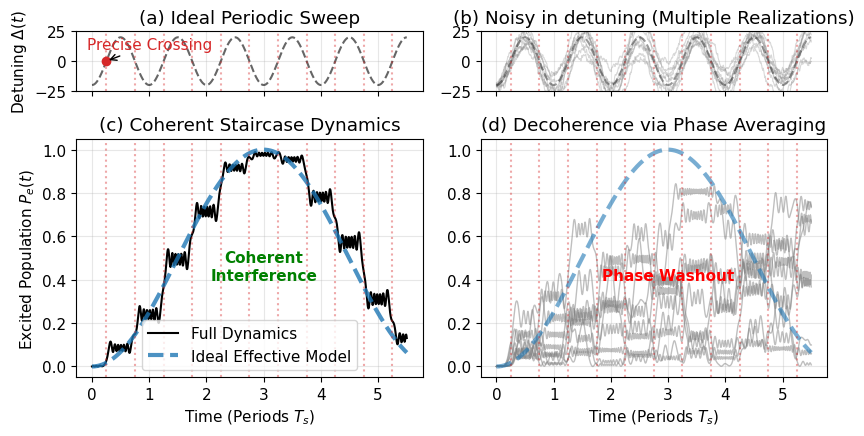

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.special import jv

# ---------------------------------------------------------
# Mocking the OU_noise class inline for standalone execution
# ---------------------------------------------------------
class OU_noise:
    def __init__(self, sigma, gamma):
        """
        Ornstein-Uhlenbeck noise generator.
        dx = -gamma * x * dt + sigma * dW
        """
        self.sigma = sigma
        self.gamma = gamma
        self.x = 0.0
        
    def update(self, dt):
        # Euler-Maruyama integration
        dW = np.random.normal(0, np.sqrt(dt))
        dx = -self.gamma * self.x * dt + self.sigma * dW
        self.x += dx
        return self.x

def simulate_lzsm(noisy=False, noise_sigma=0.0):
    # ---------------------------------------------------------
    # Parameters
    # ---------------------------------------------------------
    ws = 1.0       # Unit frequency
    Ts = 2*np.pi/ws
    Az = 20.0      # Large amplitude
    Ax = 1.0       # Coupling
    
    # Time grid
    t_max = 5.5 * Ts
    steps = 1000
    times = np.linspace(0, t_max, steps)
    dt = times[1] - times[0]
    
    # ---------------------------------------------------------
    # Hamiltonian Simulation
    # ---------------------------------------------------------
    sz = np.array([[1, 0], [0, -1]])
    sx = np.array([[0, 1], [1, 0]])
    psi = np.array([0, 1], dtype=complex) # Initial State |g>
    
    pop_e = np.zeros(steps)
    detuning_trace = np.zeros(steps)
    
    # Generate Noise
    # Note: We re-instantiate noise here to ensure unique seeds per call
    noise_gen = OU_noise(noise_sigma if noisy else 0.0, gamma=1.0/Ts)
    noise_signal = [noise_gen.update(dt) for _ in range(steps)]

    for i, t in enumerate(times):
        # Current detuning value (Ideal + Noise)
        current_detuning = -Az * np.cos(ws * t) + noise_signal[i]
        detuning_trace[i] = current_detuning
        
        # Hamiltonian H(t) = 0.5 * (Delta*sz + Omega*sx)
        H_t = 0.5 * (current_detuning * sz + Ax * sx)
        
        # Time evolution U = exp(-i*H*dt)
        U_step = expm(-1j * H_t * dt)
        psi = U_step @ psi
        pop_e[i] = np.abs(psi[0])**2

    # ---------------------------------------------------------
    # Effective Model (RWA) - Reference
    # ---------------------------------------------------------
    # Effective Rabi frequency via Bessel function
    Omega_eff = Ax * jv(0, Az/ws)
    pop_eff = np.sin(Omega_eff * times / 2)**2
   
    return times, Ts, detuning_trace, pop_e, pop_eff, Ax, Az, ws

def create_comparison_plot():
    # Setup 2x2 Plot with increased spacing between subplots
    fig, axes = plt.subplots(
        2, 2, figsize=(8.5, 4.5), sharex=True,
        gridspec_kw={'height_ratios': [0.5, 2]}
    )
    # Set figure and axes facecolor to white to remove gray background
    fig.patch.set_facecolor('white')
    for ax in axes.flatten():
        ax.set_facecolor('white')

    # Define common crossings for vertical lines (ideal case)
    crossings = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]

    # -----------------------
    # LEFT COLUMN: CLEAN (Single Trajectory)
    # -----------------------
    t1, Ts, det1, pop1, eff1, Ax, Az, ws = simulate_lzsm(noisy=False)

    # Top Left: Detuning
    axes[0,0].plot(t1/Ts, det1, 'k--', alpha=0.6)
    axes[0,0].set_title(r"(a) Ideal Periodic Sweep")
    axes[0,0].set_ylabel(r'Detuning $\Delta(t)$')

    # Bottom Left: Dynamics
    axes[1,0].plot(t1/Ts, pop1, color='black', linewidth=1.5, label='Full Dynamics')
    axes[1,0].plot(t1/Ts, eff1, color='#1f77b4', linewidth=3, linestyle='--', alpha=0.8, label='Ideal Effective Model')
    axes[1,0].set_title(r"(c) Coherent Staircase Dynamics")
    axes[1,0].set_ylabel(r'Excited Population $P_e(t)$')

    # -----------------------
    # RIGHT COLUMN: NOISY (Multiple Trajectories)
    # -----------------------
    num_trajectories = 10
    noise_magnitude = 5

    # We will accumulate population data to calculate an average later
    pop_accum = np.zeros_like(pop1)

    print(f"Simulating {num_trajectories} noisy trajectories...")

    for k in range(num_trajectories):
        t2, _, det2, pop2, eff2, _, _, _ = simulate_lzsm(noisy=True, noise_sigma=noise_magnitude)
        pop_accum += pop2

        # Plot individual trajectories with high transparency
        # Top Right: Detuning Jitter
        axes[0,1].plot(t2/Ts, det2, color='gray', linewidth=0.8, alpha=0.3)

        # Bottom Right: Population Jitter
        axes[1,1].plot(t2/Ts, pop2, color='gray', linewidth=1.0, alpha=0.5)

    # Plot the Ideal Detuning Reference on Top Right for context
    axes[0,1].plot(t1/Ts, det1, 'k--', alpha=0.4, label='Ideal Path')
    axes[0,1].set_title(r"(b) Noisy in detuning (Multiple Realizations)")

    # Plot the Average Population on Bottom Right
    #pop_avg = pop_accum / num_trajectories
    #axes[1,1].plot(t2/Ts, pop_avg, color='red', linewidth=2, label='Ensemble Average')
    axes[1,1].plot(t2/Ts, eff2, color='#1f77b4', linewidth=3, linestyle='--', alpha=0.6, label='Ideal Effective Model')
    axes[1,1].set_title(r"(d) Decoherence via Phase Averaging")
    axes[1,0].legend(loc='lower center')

    # -----------------------
    # COMMON STYLING
    # -----------------------
    for ax in axes.flatten():
        ax.grid(True, alpha=0.3)
        # Mark Ideal Crossings
        for c in crossings:
            if c*Ts < t1[-1]:
                ax.axvline(c, color='#d62728', linestyle=':', alpha=0.4)

   
    axes[1,0].set_xlabel(r'Time (Periods $T_s$)')
    axes[1,1].set_xlabel(r'Time (Periods $T_s$)')

    axes[1,0].set_ylim(-0.05, 1.05)
    axes[1,1].set_ylim(-0.05, 1.05)

    # Annotations
    axes[0,0].plot(crossings[0], 0, 'o', color='#d62728')
    axes[0,0].annotate("Precise Crossing", xy=(crossings[0], 0), xytext=(1, 10),
                 arrowprops=dict(facecolor='#d62728', arrowstyle='->'), ha='center', color='#d62728')

    axes[1,0].text(3, 0.4, "Coherent\nInterference", ha='center', color='green', fontweight='bold')
    axes[1,1].text(3, 0.4, "Phase Washout", ha='center', color='red', fontweight='bold')

    axes[0,0].set_ylim(-25, 25)
    axes[0,1].set_ylim(-25, 25)

    plt.tight_layout()
    plt.savefig(f'{figures_path}/app_fig15_lzsm_comparison_trajectories.pdf')
    plt.show()
if __name__ == "__main__":
    create_comparison_plot()

## Fig 16

In [11]:
# Load results from JSON file
import json
from pathlib import Path

# Load data.json from fig16 directory
data_file = Path('../processed_data/fig16/data.json')
if data_file.exists():
    with open(data_file, 'r') as f:
        data_fig16 = json.load(f)
    
    # Convert lists back to numpy arrays for easier manipulation
    for key in data_fig16:
        if isinstance(data_fig16[key], list) and len(data_fig16[key]) > 0:
            if isinstance(data_fig16[key][0], list):
                # Nested lists
                data_fig16[key] = [np.array(item) for item in data_fig16[key]]
            else:
                # Simple lists
                data_fig16[key] = np.array(data_fig16[key])
    
    print(f"✓ Loaded data from {data_file}")
    print(f"  Keys: {list(data_fig16.keys())}")
else:
    print(f"⚠ Warning: {data_file} not found.")

# Also load x0s from the fig16 directory
x0s_file = Path('../processed_data/fig16/x0s.json')
if x0s_file.exists():
    with open(x0s_file, 'r') as f:
        x0s = np.array(json.load(f))
    print(f"✓ Loaded x0s from {x0s_file}")
    print(f"  x0s: {x0s}")
else:
    print(f"⚠ Warning: {x0s_file} not found.")


✓ Loaded data from ../processed_data/fig16/data.json
  Keys: ['quasistatic', 'fast', 'clean']
✓ Loaded x0s from ../processed_data/fig16/x0s.json
  x0s: [ 30.          35.58823529  41.17647059  46.76470588  52.35294118
  57.94117647  63.52941176  69.11764706  74.70588235  80.29411765
  85.88235294  91.47058824  97.05882353 102.64705882 108.23529412
 113.82352941 119.41176471 125.         130.58823529 136.17647059
 141.76470588 147.35294118 152.94117647 158.52941176 164.11764706
 169.70588235 175.29411765 180.88235294 186.47058824 192.05882353
 197.64705882 203.23529412 208.82352941 214.41176471 220.        ]


<>:65: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_95920/1271561554.py:65: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Time ($\mu$s)')


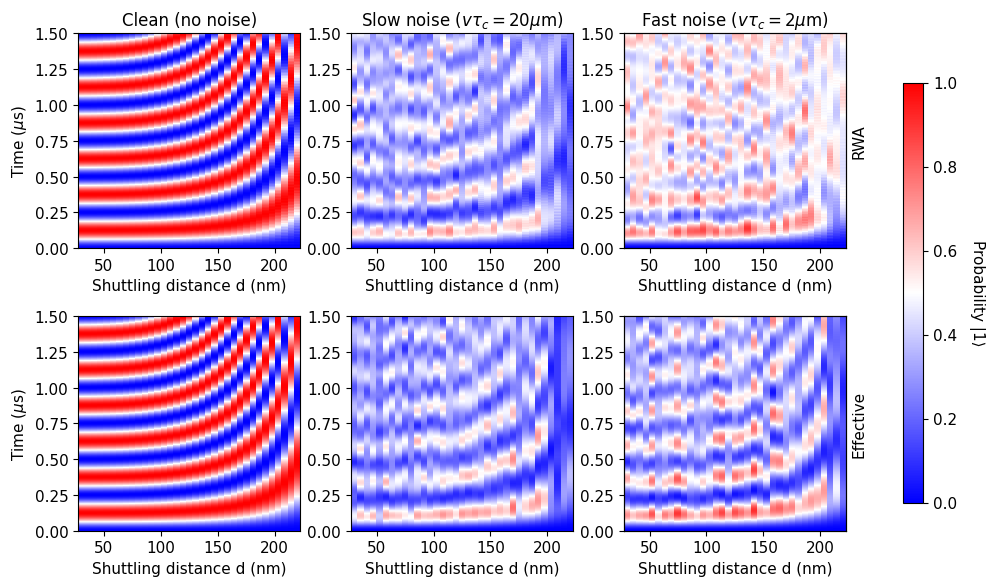

In [13]:
# Create 2x3 colorplots (2 rows: RWA/Effective, 3 columns: Clean/Quasistatic/Fast)
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# First, find a common time grid (use the longest time range)
all_times = []
for case_name in ['clean','quasistatic', 'fast']:
    for model_name in ['RWA', 'effective']:
        for times, _ in data_fig16[case_name][model_name]:
            all_times.append(times)

# Use the maximum time range and create a common grid
t_min = min(t[0] for t in all_times)
t_max = max(t[-1] for t in all_times)
# Use a reasonable number of points (e.g., from the longest trajectory)
n_times_common = max(len(t) for t in all_times)
times_common = np.linspace(t_min, t_max, n_times_common)

# Prepare data for colorplots
# Cases: clean (col 0), quasistatic (col 1), fast (col 2)
cases = [
    ("clean", r"Clean (no noise)"),
    ("quasistatic", r"Slow noise ($v\tau_c = 20\mu$m)"),
    ("fast", r"Fast noise ($v\tau_c = 2\mu$m)")
]

# Models: RWA (row 0), effective (row 1)
models = [
    ("RWA", "RWA"),
    ("effective", "Effective"),
]

# Store one image object for the colorbar
im_for_cbar = None

for idx_model, (model_name, model_label) in enumerate(models):
    for idx_case, (case_name, case_label) in enumerate(cases):
        ax = axes[idx_model, idx_case]
        
        if idx_model == 0:
            ax.set_title(case_label, fontsize = 12)

        # Collect probability data for all x0 values, interpolated to common time grid
        prob_data = []  # Will be shape (n_x0, n_times)
        
        for i, x0 in enumerate(x0s):
            times, probs = data_fig16[case_name][model_name][i]
            # Extract |1⟩ probability
            prob_1 = np.array(probs)[:, 1]
            
            # Interpolate to common time grid
            prob_1_interp = np.interp(times_common, times, prob_1)
            prob_data.append(prob_1_interp)
        
        prob_data = np.array(prob_data)  # Shape: (n_x0, n_times)
        
        # Create colorplot
        im = ax.pcolormesh(x0s, times_common/1e3, prob_data.T, cmap="bwr", vmin=0, vmax=1, rasterized=True)
        
        # Store first image for colorbar
        if im_for_cbar is None:
            im_for_cbar = im
        
        ax.set_xlabel('Shuttling distance d (nm)')
        if idx_case == 0:  # Only label y-axis for first column
            ax.set_ylabel('Time ($\mu$s)')
        
        if idx_case == 2:
            bx = ax.twinx()
            bx.set_yticks([])
            bx.set_ylabel(model_label)

# Adjust layout first to make room for colorbar on the right
plt.tight_layout(rect=[0, 0, 0.88, 1])

# Create a dedicated axes for the colorbar on the right side
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # [left, bottom, width, height] in figure coordinates

# Add common colorbar on the right side of the entire figure
cbar = fig.colorbar(im_for_cbar, cax=cbar_ax, orientation='vertical')
cbar.set_label('Probability |1⟩', rotation=270, labelpad=20)

plt.savefig(f"{figures_path}/app_fig16_LZSM_rwa_ham.pdf")



## Fig 17

/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_95920/1500671109.py:50: RuntimeWarning: divide by zero encountered in divide
  ws = 2 * np.pi * v / ds / 2 * 1e9


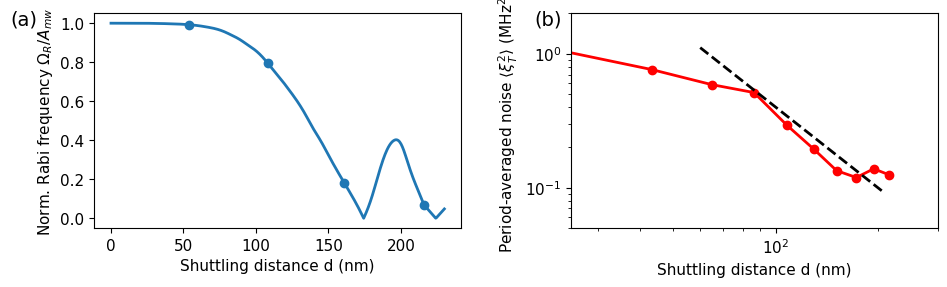

In [14]:
# Recreate tradeoff plot from Plot_fig2_fig3_fig4.ipynb
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.special import j0

# Load frequency data
freq_file = Path('../processed_data/fig2_3/freq_compare_data_for_plot.npz')
freq_data = np.load(freq_file)

xl = freq_data["t_fine_low"]
xh = freq_data["x_highfield_raw"]
fl = freq_data["freq_low_for_plot"]
fh = freq_data["y_highfield_raw"]

# Load shuttling data
field = "high"  # Use high field data
shuttling_file = Path(f'../processed_data/fig4/shuttling_{field}.pkl')
with open(shuttling_file, 'rb') as f:
    shuttling_data = pickle.load(f)



# Extract Ramsey data
T2shuttle = [shuttling_data["CPMG-3"][m]["Decay time"] * 1e-9 for m in range(len(shuttling_data["Echo"]))]  # in seconds
alpha_shuttle = [shuttling_data["Echo"][m]["Exponent"] for m in range(len(shuttling_data["Echo"]))]
distances = [shuttling_data["Echo"][m]["dx"] for m in range(len(shuttling_data["Echo"]))]  # in nm



T2shuttle = np.array(T2shuttle)
alpha_shuttle = np.array(alpha_shuttle)
distances = np.array(distances)
# Calculate period and chi
v = 10.8  # velocity in m/s (or nm/ns?)
Ts = 2 * distances / v* 1e-9  # in seconds (assuming v=10 nm/ns = 10 m/s)
chis = (Ts / T2shuttle) ** 1  # 

# Create the plot
fun_f = lambda d: np.interp(d, xh, fh[::-1])

ds = np.linspace(0, 230, 501)
dbz = lambda x: fh[-1] - fun_f(x)
v = 10.8 #m/s

ds0 = np.array([54, 108, 161, 216])    # Positions of the shuttling data
ws0 = 2 * np.pi * v / ds0 / 2 * 1e9    # shittling frequencies at the shuttling positions
dw = dbz(ds) * 2 * np.pi * 1e6
ws = 2 * np.pi * v / ds / 2 * 1e9

fig, ax = plt.subplots(1, 2, figsize=(9.5, 3))
plt.subplots_adjust(wspace=0.3)

# Left panel: Normalized Rabi frequency
ax[0].plot(ds, np.abs(j0(dw / ws / 2)), lw=2)
ax[0].scatter(ds0, np.abs(j0(dbz(ds0) * 2 * np.pi * 1e6 / ws0 / 2)))
ax[0].set_xlabel("Shuttling distance d (nm)")
ax[0].set_ylabel(r"Norm. Rabi frequency $\Omega_R/A_{mw}$")
ax[1].set_ylim(0.05,2)
# Right panel: Period-average noise
ax[1].plot(distances, chis / Ts**2 / 1e12/2/2/np.pi, "o-", lw=2, color="red")
ax[1].set_xlabel("Shuttling distance d (nm)")
ax[1].set_ylabel(r"Period-averaged noise $\langle \xi_T^2 \rangle$ (MHz$^2$)")
#ax[1].set_ylim(top = 17*1e-1)
ax[0].text(-0.23, 0.95, '(a)', fontsize=14, transform=ax[0].transAxes)
ax[1].text(-0.1, 0.95, '(b)', fontsize=14, transform=ax[1].transAxes)
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_xlim(25,300)

x = np.linspace(60,210,100)
ax[1].plot(x, 4*1e3/x**2, "--k", lw=2)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{figures_path}/app_tradeoff.pdf", bbox_inches='tight', dpi=300)
plt.show()



## Fig 18

In [15]:
import json

with open('../processed_data/fig18/data.json', 'r') as f:
    data_fig18 = json.load(f)

params_all_voltages = data_fig18['params_all_voltages']


/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_95920/3451140575.py:175: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


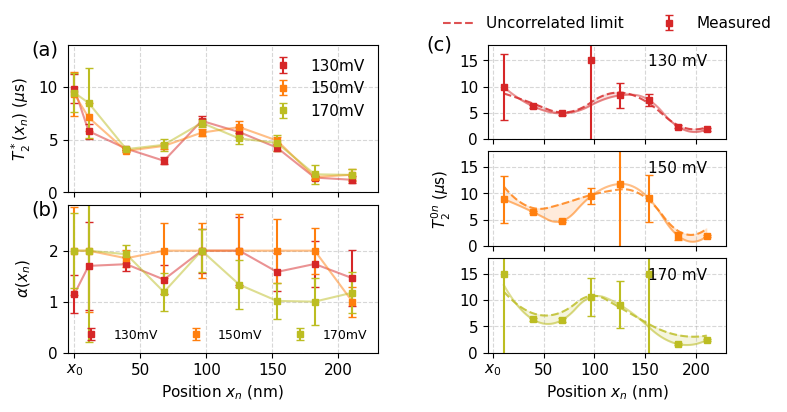

In [16]:
# Create plot with (a) chi1 T2 and (a2) alpha in left column (2 rows), and (b), (c), (d) T2^0n plots for each voltage in right column (3 rows)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.interpolate import interp1d
import correlation_fun
# Define three contrasting colors for 65mV, 75mV, 85mV
colors = ["tab:red", "tab:orange", "tab:olive"]
labels = ['130mV', '150mV', '170mV']

# Create figure: left column has 2 rows (T2 and alpha), right column has 3 rows (T2^0n for each voltage)
# Use 6 rows total to accommodate both: left column 2 equal sections, right column 3 equal sections
fig = plt.figure(figsize=(8.5, 4))
gs = fig.add_gridspec(6, 2, height_ratios=[1, 1, 1, 1, 1, 1], width_ratios=[1.3, 1], 
                      hspace=0.3, wspace=0.4)

# Panel (a): Top half of left column for chi1 T2 data (spans rows 0-2)
ax1 = fig.add_subplot(gs[0:3, 0])  # Spans first 3 rows, left column

# Panel (a2): Bottom half of left column for alpha data (spans rows 3-5)
ax1_alpha = fig.add_subplot(gs[3:6, 0])  # Spans last 3 rows, left column

# Panels (b), (c), (d): Each spans 2 rows in right column for T2^0n plots
ax2 = fig.add_subplot(gs[0:2, 1])  # Panel (b) for 65mV - spans rows 0-1
ax3 = fig.add_subplot(gs[2:4, 1])  # Panel (c) for 75mV - spans rows 2-3
ax4 = fig.add_subplot(gs[4:6, 1])  # Panel (d) for 85mV - spans rows 4-5
ax2_list = [ax2, ax3, ax4]

# Plot chi1 T2 data in panel (a) - all three voltages in one plot
for m in range(3):
    params = params_all_voltages[m]
    T2s = np.array([params["chi1"][k]["T2"] for k in range(9)]) / 1e3  # Convert to microseconds
    dT2s = np.array([params["chi1"][k]["dT"] for k in range(9)]) / 1e3  # Convert to microseconds
    distances1 = np.array([params["chi1"][k]["x"] for k in range(9)])
    distances1_ind = np.argsort(distances1)
    T2s = T2s[distances1_ind]
    dT2s = dT2s[distances1_ind]
    distances1 = distances1[distances1_ind]

    line = ax1.errorbar(distances1, T2s, yerr=dT2s, fmt='s', capsize=3, 
                        ms=4, color=colors[m], label=labels[m])
    ax1.plot(distances1, T2s, '-', color=colors[m], alpha=0.5)

# Plot chi1 alpha (n) data in panel (a2) - all three voltages in one plot
for m in range(3):
    params = params_all_voltages[m]
    alphas = np.array([params["chi1"][k]["n"] for k in range(9)])
    dalphas = np.array([params["chi1"][k]["dn"] for k in range(9)])
    distances1 = np.array([params["chi1"][k]["x"] for k in range(9)])
    distances1_ind = np.argsort(distances1)
    alphas = alphas[distances1_ind]
    dalphas = dalphas[distances1_ind]
    distances1 = distances1[distances1_ind]

    line = ax1_alpha.errorbar(distances1, alphas, yerr=dalphas, fmt='s', capsize=3, 
                              ms=4, color=colors[m], label=labels[m])
    ax1_alpha.plot(distances1, alphas, '-', color=colors[m], alpha=0.5)

# Plot T2^0n vs distance with uncorrelated limit for each voltage in panels (b), (c), (d)
for m in range(3):
    ax = ax2_list[m]  # Get the axis for this voltage
    params = params_all_voltages[m]
    
    # Get measured T2^0n (from chi12)
    T2_0n_measured = np.array([params["chi12"][k]["T2"] for k in range(8)]) / 1e3  # Convert to microseconds
    dT2_0n_measured = np.array([params["chi12"][k]["dT"] for k in range(8)]) / 1e3
    distances = np.array([params["chi1"][k+1]["x"] for k in range(8)])
    
    # Compute T12eff (uncorrelated limit) for each position
    T12eff_values = []
    for k in range(8):
        # Get reference position (index 0) and current position (index k+1)
        T2_xn = params["chi1"][0]["T2"]  # Reference position T2
        T2_xm = params["chi1"][k+1]["T2"]  # Current position T2
        alpha_xn = params["chi1"][0]["n"]  # Reference position alpha
        alpha_xm = params["chi1"][k+1]["n"]  # Current position alpha
        
        # Compute T12eff using uncorrelated limit (identity correlation matrix)
        T12eff, _ = correlation_fun.calculate_chi_with_background_corrected(
            [T2_xn, T2_xm], [alpha_xn, alpha_xm], 2, np.eye(2), 1e99, 2
        )
        T12eff_values.append(T12eff / 1e3)  # Convert to microseconds
    
    T12eff_values = np.array(T12eff_values)
    
    # Filter points for interpolation: skip points where error bar > 0.4*T2
    mask = dT2_0n_measured <= 0.8 * T2_0n_measured
    
    # Create filtered arrays for interpolation
    distances_filtered = distances[mask]
    T2_0n_measured_filtered = T2_0n_measured[mask]
    T12eff_values_filtered = T12eff_values[mask]
    
    # Interpolate measured and uncorrelated values (using filtered data)
    f_measured = interp1d(distances_filtered, T2_0n_measured_filtered, kind='quadratic', fill_value='extrapolate')
    f_eff = interp1d(distances_filtered, T12eff_values_filtered, kind='quadratic', fill_value='extrapolate')
    
    x_interp = np.linspace(np.min(distances), np.max(distances), 100)
    ymeasured_interp = f_measured(x_interp)
    yeff_interp = f_eff(x_interp)
    
    # Plot measured data with error bars
    line_measured = ax.errorbar(
        distances, T2_0n_measured, yerr=dT2_0n_measured,
        fmt='s', capsize=3, color=colors[m], label='Measured', ms=4
    )
    
    # Plot uncorrelated limit (dashed line)
    line_uncorr, = ax.plot(
        x_interp, yeff_interp, "--", color=colors[m], linewidth=1.5, alpha=0.8, label='Uncorrelated limit'
    )
    
    # Plot interpolated measured line
    ax.plot(x_interp, ymeasured_interp, "-", color=colors[m], alpha=0.5, linewidth=1.5)
    
    # Fill between curves
    ax.fill_between(x_interp, yeff_interp, ymeasured_interp, 
                     where=(yeff_interp > ymeasured_interp), 
                     color=colors[m], alpha=0.15)

# Style panel (a) - chi1 T2
ax1.set_ylabel(r"$T_2^*(x_n)$ ($\mu$s)")
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_xlim(-5, 230)
ax1.set_xticks([0, 50, 100, 150, 200])
ax1.set_xticklabels([])  # Remove x-axis labels for top panel
ax1.set_yticks([0, 5, 10, 15])
ax1.set_ylim(0, 14)
ax1.legend(frameon=False, loc='upper right')

# Style panel (a2) - chi1 alpha
ax1_alpha.set_ylabel(r"$\alpha(x_n)$")
ax1_alpha.set_xlabel("Position $x_n$ (nm)")
ax1_alpha.grid(True, linestyle='--', alpha=0.5)
ax1_alpha.set_xlim(-5, 230)
ax1_alpha.set_xticks([0, 50, 100, 150, 200])
ax1_alpha.set_xticklabels([r"$x_0$", 50, 100, 150, 200])
ax1_alpha.set_ylim(0, 2.9)
# Set y-axis limits based on typical alpha values (adjust if needed)
ax1_alpha.legend(frameon=False, loc='lower center', ncol=3, fontsize = 9)

# Style panels (b), (c), (d) - T2^0n plots
panel_labels_t2 = ['(c)']
label = ["130 mV", "150 mV", "170 mV"]
for m, ax in enumerate(ax2_list):
    if m==1:
        ax.set_ylabel(r"$T_2^{0n}$ ($\mu$s)")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlim(-5, 230)
    ax.set_xticks([0, 50, 100, 150, 200])
    if m == 2:  # Only bottom panel has xlabel
        ax.set_xlabel("Position $x_n$ (nm)")
        ax.set_xticklabels([r"$x_0$", 50, 100, 150, 200])
    else:
        ax.set_xticklabels([])  # Remove x-axis labels for upper panels
    ax.set_yticks([0, 5, 10, 15])
    ax.set_ylim(0, 18)
    if m==0:
        ax.legend(frameon=False, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.45))
    # Add panel label
    if m==0:
        ax.text(-0.15, 1.1, panel_labels_t2[m], transform=ax.transAxes, 
            fontsize=14, va='top', ha='right')
    ax.text(0.92,0.9, label[m], transform=ax.transAxes, va='top', ha='right')

# Add panel labels for (a) and (a2)
ax1.text(-0.03, 1.03, '(a)', transform=ax1.transAxes, 
         fontsize=14, va='top', ha='right')
ax1_alpha.text(-0.03, 1.03, '(b)', transform=ax1_alpha.transAxes, 
               fontsize=14, va='top', ha='right')

# Align y-labels
all_axes = [ax1, ax1_alpha] + ax2_list
fig.align_ylabels(all_axes)

plt.tight_layout()
plt.savefig(f"{figures_path}/app_two_point_voltaes.pdf", bbox_inches='tight', dpi=300)
plt.show()


## Fig 19, 20

In [17]:
import sys
import os
import importlib

common_path = Path().resolve().parent / 'common_scripts'
sys.path.insert(0, str(common_path))
import data_processor as processor

importlib.reload(processor)
import matplotlib.gridspec as gridspec
# Comprehensive plotting function adapted from two_point_gen.ipynb


def create_comprehensive_plot(params_dict, shuttling_distances, field_label, S1_data, S2_data, S12_data, wait_times1, wait_times12, wait_times_ref, single_color='tab:blue', two_point_color='tab:red'):
    """
    Create comprehensive plot showing:
    - First row: T2(n) - single-dot decay times vs position
    - Second row: alpha(n) - single-dot exponents vs position
    - Third row: data and fit for each position (single-dot measurements, including reference)
    - Fourth row: T2(0,n) two point - two-point correlation decay times vs position
    - Fifth row: alpha(0,n) two point - two-point correlation exponents vs position
    - Sixth row: data and fit for each position (two-point correlation measurements, first column empty)
    
    Parameters:
    - single_color: Color for single-dot plots (default: 'tab:blue')
    - two_point_color: Color for two-point correlation plots (default: 'tab:red')
    """
    params_chi1 = params_dict["chi1"]
    params_chi12 = params_dict["chi12"]
    
    # Extract parameters for plotting
    # Reference position (index 0)
    ref_distance = params_chi1[0]["x"]  # Should be 0
    ref_T2 = params_chi1[0]["T2"]/1000  # Convert to microseconds
    ref_T2_err = params_chi1[0]["dT"]/1000
    ref_alpha = params_chi1[0]["n"]
    ref_alpha_err = params_chi1[0]["dn"]
    
    # Single-dot measurements (skip reference position at index 0)
    chi1_distances = [p["x"] for p in params_chi1[1:]]
    chi1_T2 = [p["T2"]/1000 for p in params_chi1[1:]]  # Convert to microseconds
    chi1_T2_err = [p["dT"]/1000 for p in params_chi1[1:]]
    chi1_alpha = [p["n"] for p in params_chi1[1:]]
    chi1_alpha_err = [p["dn"] for p in params_chi1[1:]]
    
    # Include reference in the lists for plotting
    chi1_distances_with_ref = chi1_distances + [ref_distance] 
    chi1_T2_with_ref = chi1_T2 + [ref_T2] 
    chi1_T2_err_with_ref = chi1_T2_err + [ref_T2_err]
    chi1_alpha_with_ref = chi1_alpha + [ref_alpha] 
    chi1_alpha_err_with_ref = chi1_alpha_err + [ref_alpha_err] 
    

    

    # Two-point correlation measurements (params_chi12 doesn't include reference)
    chi12_distances = [p["x"] for p in params_chi12]
    chi12_T2 = [p["T2"]/1000 for p in params_chi12]  # Use T12eff
    chi12_T2_err = [p["dT"]/1000 for p in params_chi12]  # Approximate error
    chi12_alpha = [p["n"] for p in params_chi12]
    chi12_alpha_err = [p["dn"] for p in params_chi12]  # Approximate error
    
    # Number of positions (excluding reference)
    N_cols_shuttled = len(chi1_distances)
    # For single-dot plots, include reference position (add 1 column)
    N_cols_single = N_cols_shuttled + 1
    # For two-point plots, same number but first column will be empty
    N_cols_two = N_cols_shuttled + 1
    
    # Define height ratios for GridSpec
    nrows_logical = 6
    height_ratios_logical = [1, 1, 1.5, 1, 1, 1.5]
    
    # Use max columns for GridSpec
    N_cols_max = max(N_cols_single, N_cols_two)
    
    fig = plt.figure(figsize=(8, 7.5/6.5*8.5))
    gs = gridspec.GridSpec(nrows_logical, N_cols_max, figure=fig,
                           height_ratios=height_ratios_logical,
                           hspace=0.45, wspace=0.0)
    
    # Sort single-dot data by distance for plotting
    chi1_sort_indices = np.argsort(chi1_distances_with_ref)
    chi1_distances_sorted = [chi1_distances_with_ref[i] for i in chi1_sort_indices]
    chi1_T2_sorted = [chi1_T2_with_ref[i] for i in chi1_sort_indices]
    chi1_T2_err_sorted = [chi1_T2_err_with_ref[i] for i in chi1_sort_indices]
    chi1_alpha_sorted = [chi1_alpha_with_ref[i] for i in chi1_sort_indices]
    chi1_alpha_err_sorted = [chi1_alpha_err_with_ref[i] for i in chi1_sort_indices]
    
    # Row 1: T2(n) - single-dot decay times (including reference)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.errorbar(chi1_distances_sorted, chi1_T2_sorted, yerr=chi1_T2_err_sorted, fmt='o-', 
                 color=single_color, ecolor=single_color, capsize=3, markersize=5, 
                 markerfacecolor='white', markeredgecolor=single_color, label='Single-position')
    ax1.set_ylabel(r'$T_2^*(x_n)$ ($\mu$s)')
    ax1.legend()
    ax1.grid(True, linestyle=':')
    
    # Row 2: alpha(n) - single-dot exponents (including reference)
    ax2 = fig.add_subplot(gs[1, :], sharex=ax1)
    ax2.errorbar(chi1_distances_sorted, chi1_alpha_sorted, yerr=chi1_alpha_err_sorted, fmt='o-',
                 color=single_color, ecolor=single_color, capsize=3, markersize=5,
                 markerfacecolor='white', markeredgecolor=single_color)
    ax2.set_ylabel(r'$\alpha(x_n)$')
    ax2.set_xlabel('Position $x_n$ (nm)')
    ax2.set_ylim(0.9, 2.5)
    ax2.grid(True, linestyle=':')
    
    # Row 3: Individual decay plots for single-dot (including reference position)
    # Create mapping from distance-sorted order to column positions
    # All distances: reference (index 0) + shuttled positions (indices 1, 2, ...)
    all_distances = [ref_distance] + chi1_distances
    all_indices = [0] + [i+1 for i in range(N_cols_shuttled)]
    
    # Sort by distance and create column mapping
    sorted_pairs = sorted(zip(all_distances, all_indices))
    index_to_col = {}
    for col_idx, (dist, orig_idx) in enumerate(sorted_pairs):
        index_to_col[orig_idx] = col_idx
    
    # Reference position (index 0)
    # Load raw data
    data1_ref = np.array(S1_data.copy())
    if len(data1_ref.shape) > 1:
        data1_ref = data1_ref[0]  # Take first if 2D
    data1_ref = data1_ref - np.mean(data1_ref)  # Detrend
    
    p_chi1_ref = params_chi1[0]
    A1_ref, T1_ref, n1_ref = p_chi1_ref["A"], p_chi1_ref["T2"], p_chi1_ref["n"]
    wait_times_ref = np.array(wait_times_ref)
    # Scale raw data by fit amplitude
    amplitudes1_ref = data1_ref / A1_ref  # Scale by fit amplitude
    t_data1_ref = wait_times_ref  # Use original wait times
    
    # Create fit curve for reference (with sign)
    # Convert time to microseconds
    wait_times_ref_us = wait_times_ref / 1000
    fit_x1_ref = np.linspace(wait_times_ref_us[0], wait_times_ref_us[-1], 100)
    envelope1_ref = processor.envelope_func(fit_x1_ref * 1000, A1_ref, T1_ref, n1_ref) / A1_ref  # Scale by A
    # Also plot negative envelope
    envelope1_ref_neg = -processor.envelope_func(fit_x1_ref * 1000, A1_ref, T1_ref, n1_ref) / A1_ref
    
    # Plot reference position in column determined by distance sorting
    col_ref = index_to_col[0]
    ax_single_ref = fig.add_subplot(gs[2, col_ref])
    t_data1_ref_us = t_data1_ref / 1000
    ax_single_ref.scatter(t_data1_ref_us, amplitudes1_ref, s=2, alpha=0.7, color=single_color)
    # Add connecting line between dots
    ax_single_ref.plot(t_data1_ref_us, amplitudes1_ref, color=single_color, lw=1, alpha=0.4)
    ax_single_ref.plot(fit_x1_ref, envelope1_ref, color=single_color, lw=2)
    ax_single_ref.plot(fit_x1_ref, envelope1_ref_neg, color=single_color, lw=2)
    ax_single_ref.grid(True, linestyle='-', lw=0.4)
    ax_single_ref.set_ylim(-0.5, 0.5)
    ax_single_ref.set_yticks([-0.4,-0.2,0,0.2,0.4])
    ax_single_ref.set_ylabel('Amp. Single')
    
    # Sort data arrays by x to match sorted parameters (params are already sorted by x)
    # Create mapping: for each sorted param, find its original index in shuttling_distances
    chi1_sorted_to_original = []
    for p in params_chi1[1:]:  # Skip reference at index 0, params are already sorted by x
        # Find original index by matching distance
        original_idx = np.where(np.abs(shuttling_distances - p["x"]) < 1e-6)[0]
        if len(original_idx) > 0:
            chi1_sorted_to_original.append(original_idx[0])
        else:
            # Fallback: use index based on position in sorted list
            chi1_sorted_to_original.append(len(chi1_sorted_to_original))
    
    # Sort S2_data to match sorted parameter order (sorted by x, with 0 near smallest)
    if len(S2_data.shape) == 2:
        S2_data_sorted = S2_data[chi1_sorted_to_original, :]
    else:
        S2_data_sorted = S2_data[0, chi1_sorted_to_original, :]
    
    # Then plot shuttled positions (already sorted by x)
    for sorted_idx in range(N_cols_shuttled):
        col = index_to_col[sorted_idx+1]  # Use distance-sorted column mapping
        
        # Load raw data
        if len(S2_data_sorted.shape) == 2:
            data2 = S2_data_sorted[sorted_idx, :].copy()
        else:
            data2 = S2_data_sorted[sorted_idx].copy()
        data2 = data2 - np.mean(data2)  # Detrend
        
        # Get fit parameters - already sorted by x
        p_chi1 = params_chi1[sorted_idx+1]
        A1, T1, n1 = p_chi1["A"], p_chi1["T2"], p_chi1["n"]
        
        # Scale raw data by fit amplitude
        amplitudes1 = data2 / A1  # Scale by fit amplitude
        t_data1 = wait_times1  # Use original wait times
        
        # Create fit curve (with sign)
        # Convert time to microseconds
        wait_times_us = wait_times1 / 1000
        fit_x1 = np.linspace(wait_times_us[0], wait_times_us[-1], 100)
        envelope1 = processor.envelope_func(fit_x1 * 1000, A1, T1, n1) / A1  # Scale by A
        envelope1_neg = -processor.envelope_func(fit_x1 * 1000, A1, T1, n1) / A1
        
        # Plot single-dot data
        ax_single = fig.add_subplot(gs[2, col])
        t_data1_us = t_data1 / 1000
        ax_single.scatter(t_data1_us, amplitudes1, s=2, alpha=0.7, color=single_color)
        # Add connecting line between dots
        ax_single.plot(t_data1_us, amplitudes1, color=single_color, lw=1, alpha=0.4)
        ax_single.plot(fit_x1, envelope1, color=single_color, lw=1.4)
        ax_single.plot(fit_x1, envelope1_neg, color=single_color, lw=1.4)
        ax_single.grid(True, linestyle='-', lw=0.4)
        ax_single.set_ylim(-0.5, 0.5)
        ax_single.set_yticks([-0.4,-0.2,0,0.2,0.4])
        ax_single.set_yticklabels([])
        ax_single_ref.set_xlim(ax_single.get_xlim())
        ax_single_ref.set_xticks([10])
        ax_single.set_xticks([10])

        if col == N_cols_max//2:  # Middle column
            ax_single.set_xlabel(r'Time ($\mu$s)')
     
    # Sort two-point data by distance for plotting
    chi12_sort_indices = np.argsort(chi12_distances)
    chi12_distances_sorted = [chi12_distances[i] for i in chi12_sort_indices]
    chi12_T2_sorted = [chi12_T2[i] for i in chi12_sort_indices]
    chi12_T2_err_sorted = [chi12_T2_err[i] for i in chi12_sort_indices]
    chi12_alpha_sorted = [chi12_alpha[i] for i in chi12_sort_indices]
    chi12_alpha_err_sorted = [chi12_alpha_err[i] for i in chi12_sort_indices]
    
    # Row 4: T2(0,n) two point - two-point correlation decay times
    ax3 = fig.add_subplot(gs[3, :], sharex=ax1)
    ax3.errorbar(chi12_distances_sorted, chi12_T2_sorted, yerr=chi12_T2_err_sorted, fmt='s-',
                 color=two_point_color, ecolor=two_point_color, capsize=3, markersize=5,
                 markerfacecolor='white', markeredgecolor=two_point_color, label='Two-point')
    ax3.set_ylabel(r'$T_2^{*,0n}$ ($\mu$s)')
    ax3.legend()
    ax3.grid(True, linestyle=':')
    
    # Row 5: alpha(0,n) two point - two-point correlation exponents
    ax4 = fig.add_subplot(gs[4, :], sharex=ax1)
    ax4.errorbar(chi12_distances_sorted, chi12_alpha_sorted, yerr=chi12_alpha_err_sorted, fmt='s-',
                 color=two_point_color, ecolor=two_point_color, capsize=3, markersize=5,
                 markerfacecolor='white', markeredgecolor=two_point_color)
    ax4.set_ylabel(r'$\alpha_{0n}$')
    ax4.grid(True, linestyle=':')
    ax4.set_xlabel(r'Position $x_n$ (nm)')
    ax4.set_ylim(0.9, 2.5)
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xlim(-1,220)

    # Row 6: Individual decay plots for two-point (first column empty)
    # Create column mapping for two-point: skip column 0, then use distance-sorted order
    # Map shuttled indices to columns, but shift by 1 to leave column 0 empty
    two_point_col_mapping = {}
    sorted_shuttled = sorted(zip(chi1_distances, range(N_cols_shuttled)))
    for col_idx, (dist, orig_i) in enumerate(sorted_shuttled):
        two_point_col_mapping[orig_i] = col_idx + 1  # Start from column 1
    
    # Sort S12_data to match sorted parameter order (params_chi12 is already sorted by x)
    chi12_sorted_to_original = []
    for p in params_chi12:  # params_chi12 is already sorted by x
        # Find original index by matching distance
        original_idx = np.where(np.abs(shuttling_distances - p["x"]) < 1e-6)[0]
        if len(original_idx) > 0:
            chi12_sorted_to_original.append(original_idx[0])
        else:
            # Fallback: use index based on position in sorted list
            chi12_sorted_to_original.append(len(chi12_sorted_to_original))
    
    if len(S12_data.shape) == 2:
        S12_data_sorted = S12_data[chi12_sorted_to_original, :]
    else:
        S12_data_sorted = S12_data[0, chi12_sorted_to_original, :]
    
    for sorted_idx in range(N_cols_shuttled):
        # Find which chi1 index this corresponds to for column mapping (both are sorted by x)
        chi12_dist = params_chi12[sorted_idx]["x"]
        chi1_match_idx = None
        for j, chi1_dist in enumerate(chi1_distances):
            if abs(chi1_dist - chi12_dist) < 1e-6:
                chi1_match_idx = j
                break
        if chi1_match_idx is None:
            chi1_match_idx = sorted_idx  # Fallback
        
        col = two_point_col_mapping[chi1_match_idx]  # Use distance-sorted column mapping (column 0 is empty)
        
        # Load raw data
        if len(S12_data_sorted.shape) == 2:
            data12 = S12_data_sorted[sorted_idx, :].copy()
        else:
            data12 = S12_data_sorted[sorted_idx].copy()
        data12 = data12 - np.mean(data12)  # Detrend
        
        # Get fit parameters - already sorted by x
        p_chi12 = params_chi12[sorted_idx]
        A12, T12, n12 = p_chi12["A"], p_chi12["T2"], p_chi12["n"]
        
        # Scale raw data by fit amplitude
        amplitudes12 = data12 / A12  # Scale by fit amplitude
        t_data12 = wait_times12 / 1000  # Use original wait times, convert to microseconds
        
        # Create fit curve (with sign)
        # Convert time to microseconds
        wait_times_us = wait_times12 / 1000
        fit_x12 = np.linspace(wait_times_us[0], wait_times_us[-1], 100)
        envelope12 = processor.envelope_func(fit_x12 * 1000, A12, T12, n12) / A12  # Scale by A
        envelope12_neg = -processor.envelope_func(fit_x12 * 1000, A12, T12, n12) / A12
        
        # Plot two-point data
        ax_two = fig.add_subplot(gs[5, col])
        ax_two.scatter(t_data12, amplitudes12, s=2, alpha=0.7, color=two_point_color)
        # Add connecting line between dots
        ax_two.plot(t_data12, amplitudes12, color=two_point_color, lw=0.5, alpha=0.4)
        ax_two.plot(fit_x12, envelope12, color=two_point_color, lw=2)
        ax_two.plot(fit_x12, envelope12_neg, color=two_point_color, lw=2)
        ax_two.grid(True, linestyle='-', lw=0.4)
        ax_two.set_ylim(-0.5, 0.5)
        ax_two.set_xticks([10])
        if col == N_cols_max//2:  # Middle column
            ax_two.set_xlabel(r'Time ($\mu$s)')
        if col == 1:
            ax_two.set_ylabel('Amp. Two-point')
        else:
            plt.setp(ax_two.get_yticklabels(), visible=False)
    
    plt.subplots_adjust(left=0.08, right=0.99, top=0.99, bottom=0.05)
    plt.savefig(f'{figures_path}/app_two_point_{field_label}.pdf')
    plt.show()


In [18]:
import json

with open("../processed_data/fig19_20/data_high.json", "r") as f_high:
    data_high = json.load(f_high)

with open("../processed_data/fig19_20/data_low.json", "r") as f_low:
    data_low = json.load(f_low)



Creating low-field comprehensive plot...


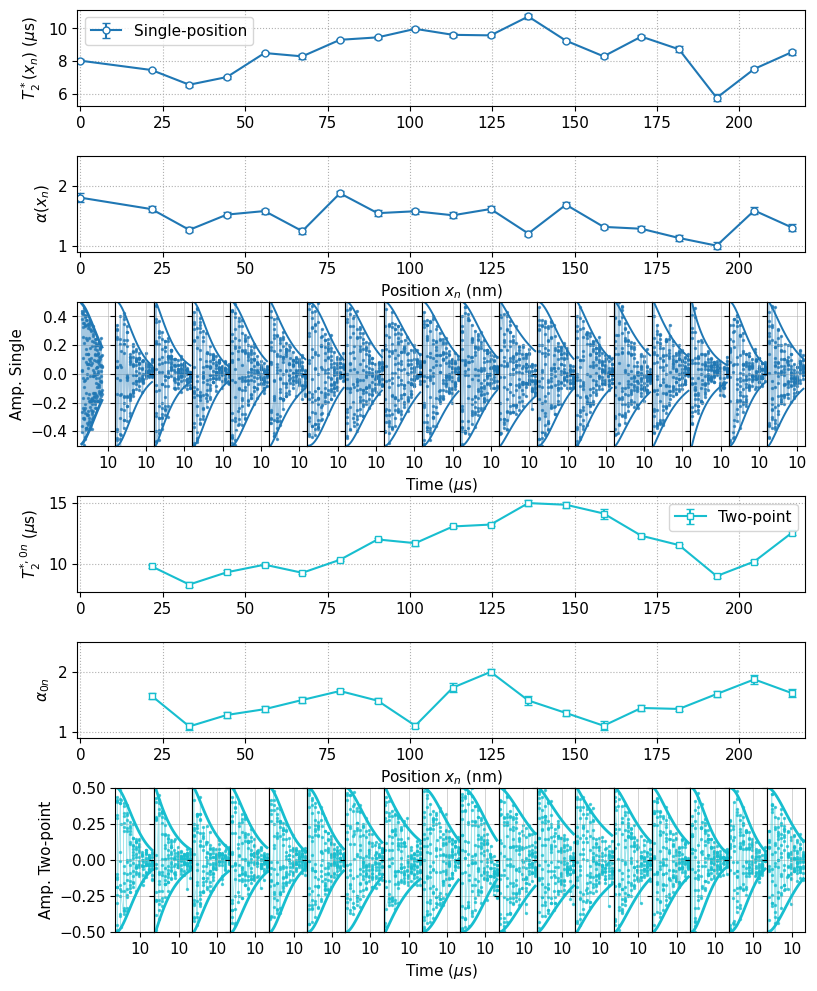

In [19]:
params_low = data_low["params_low"]
shuttling_distances_low = np.array(data_low["shuttling_distances_low"])
S1_low = np.array(data_low["S1_low"])
S2_low = np.array(data_low["S2_low"])
S12_low = np.array(data_low["S12_low"])
wait_times_low = np.array(data_low["wait_times_low"])
wait_times12 = np.array(data_low["wait_times12"])
wait_times_ref_low = np.array(data_low["wait_times_ref_low"])


# Create plot for low field
print("Creating low-field comprehensive plot...")
create_comprehensive_plot(params_low, shuttling_distances_low, "low_field", 
                         S1_low, S2_low, S12_low, wait_times_low, wait_times12, wait_times_ref_low, 
                         single_color="tab:blue", two_point_color="tab:cyan")

Creating high-field comprehensive plot...


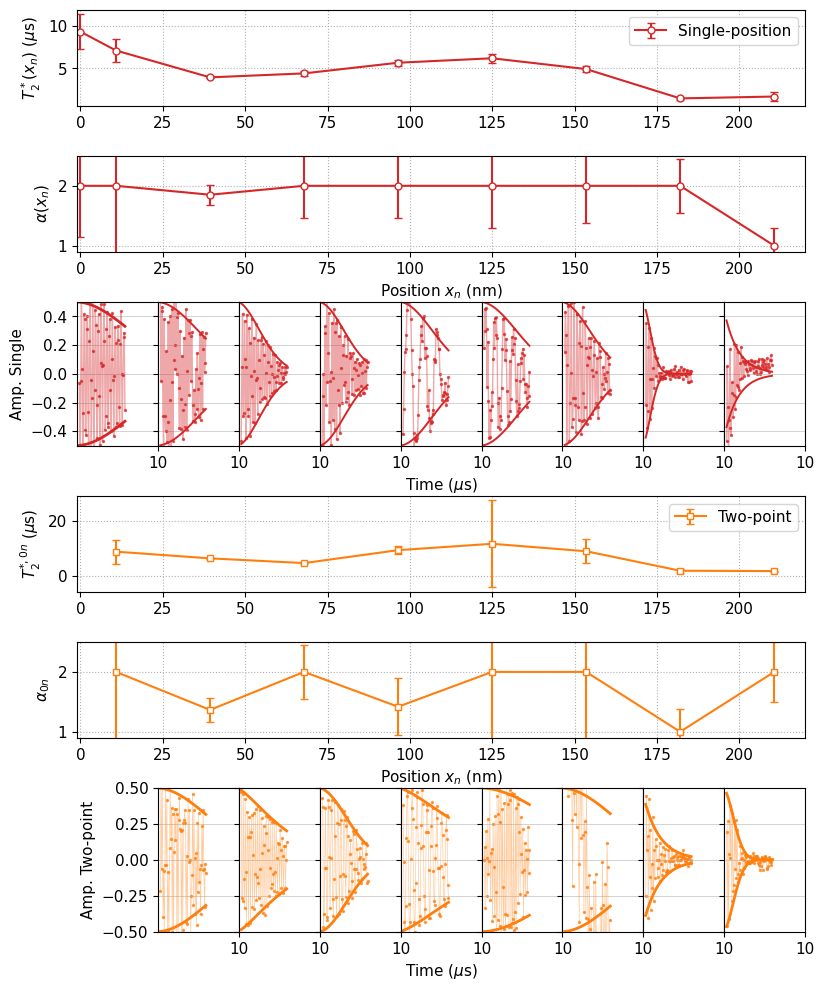

In [20]:
params_high = data_high["params_high"]
shuttling_distances_high = np.array(data_high["shuttling_distances_high"])
S1_high = np.array(data_high["S1_high"])
S2_high = np.array(data_high["S2_high"])
S12_high = np.array(data_high["S12_high"])
wait_times_high = np.array(data_high["wait_times_high"])
wait_times12_high = np.array(data_high["wait_times_high"])
wait_times_ref_high = np.array(data_high["wait_times_ref_high"])

# Create plot for high field
print("Creating high-field comprehensive plot...")
create_comprehensive_plot(params_high, shuttling_distances_high, "high_field", 
                         S1_high, S2_high, S12_high, wait_times_high, wait_times12_high, wait_times_ref_high, 
                         single_color="tab:red", two_point_color="tab:orange")

## Fig 21 & 22

In [21]:
with open("../processed_data/fig21_22/data_high.json", "r") as f:
    data_fig21_22_high = json.load(f)



# Unpack data for plotting
ramsey_results = data_fig21_22_high["ramsey_results"]
echo_results = data_fig21_22_high["echo_results"]
cpmg5_results_list = data_fig21_22_high["cpmg5_results_list"]
shuttle_distance_ramsey = np.array(data_fig21_22_high["shuttle_distance_ramsey"])
shuttle_distance_echo = np.array(data_fig21_22_high["shuttle_distance_echo"])
shuttle_distance_cpmg5 = np.array(data_fig21_22_high["shuttle_distance_cpmg5"])
n_pipulse_cpmg = data_fig21_22_high["n_pipulse_cpmg"]

# Set figure_path to match what the plotting code expects
figure_path = figures_path

print(f"✓ Loaded data for high field shuttling plot")
print(f"  Ramsey results: {len(ramsey_results)}")
print(f"  Echo results: {len(echo_results)}")
print(f"  CPMG results: {len(cpmg5_results_list)}")
print(f"  CPMG pi pulses: {n_pipulse_cpmg}")


✓ Loaded data for high field shuttling plot
  Ramsey results: 9
  Echo results: 10
  CPMG results: 10
  CPMG pi pulses: 3


<>:132: SyntaxWarning: invalid escape sequence '\m'
<>:132: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_95920/2548383107.py:132: SyntaxWarning: invalid escape sequence '\m'
  ax_c.set_xlabel('Time ($\mu$s)')


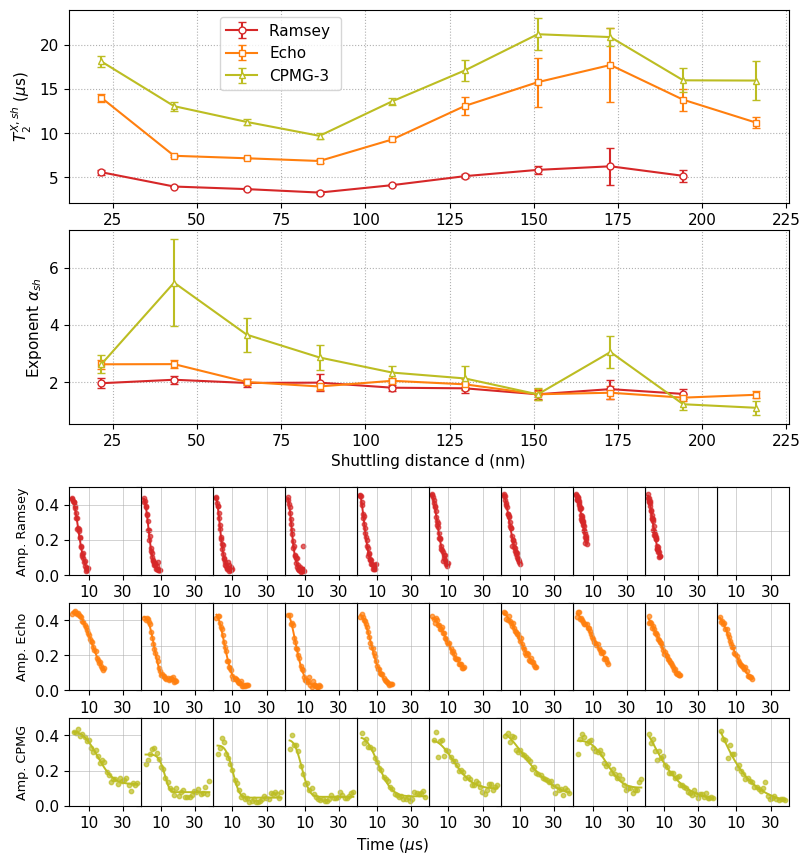

In [22]:
# Plot high field results
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def exp_decay(x, A, T, n, B):
    if T == 0: return np.zeros_like(x) + A
    with np.errstate(over='ignore'):
        term = np.clip(-(x / T)**n, -700, 700)
        return A * np.exp(term) + B

# Color definitions
dark_pink = "#d72660"
ramsey_color = "tab:red"
echo_color = "tab:orange"
cpmg_color = "tab:olive"

# Filter out None results
valid_ramsey = [r for r in ramsey_results if r is not None]
valid_echo = [r for r in echo_results if r is not None]
valid_cpmg = [r for r in cpmg5_results_list if r is not None]

N_cols = len(valid_echo)  # Use echo as reference for columns

if N_cols == 0:
    print("No analysis results to plot.")
else:
    # Prepare data
    r_cv_stops = [r['cv_stop'] for r in valid_ramsey]
    r_T = [r['Decay time']/1000 for r in valid_ramsey]
    r_T_err = [r['Decay time_err']/1000 for r in valid_ramsey]
    r_n = [r['Exponent'] for r in valid_ramsey]
    r_n_err = [r['Exponent_err'] for r in valid_ramsey]

    e_cv_stops = [r['cv_stop'] for r in valid_echo]
    e_T = [r['Decay time']/1000 for r in valid_echo]
    e_T_err = [r['Decay time_err']/1000 for r in valid_echo]
    e_n = [r['Exponent'] for r in valid_echo]
    e_n_err = [r['Exponent_err'] for r in valid_echo]

    c_cv_stops = [r['cv_stop'] for r in valid_cpmg]
    c_T = [r['Decay time']/1000 for r in valid_cpmg]
    c_T_err = [r['Decay time_err']/1000 for r in valid_cpmg]
    c_n = [r['Exponent'] for r in valid_cpmg]
    c_n_err = [r['Exponent_err'] for r in valid_cpmg]

    # GridSpec Definition with height_ratios
    nrows_logical = 6
    height_ratios_logical = [2.2, 2.2, 0.1, 1, 1, 1]

    fig = plt.figure(figsize=(8, 7.5/6.5*7.5))
    gs = gridspec.GridSpec(nrows_logical, N_cols, figure=fig,
                           height_ratios=height_ratios_logical,
                           hspace=0.25, wspace=0.0)

    # Row 1: Decay Times (Occupies logical row 0)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.errorbar(shuttle_distance_ramsey, r_T, yerr=r_T_err, fmt='o-', color=ramsey_color,
                 ecolor=ramsey_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=ramsey_color, label='Ramsey ')
    ax1.errorbar(shuttle_distance_echo, e_T, yerr=e_T_err, fmt='s-', color=echo_color,
                 ecolor=echo_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=echo_color, label='Echo')
    ax1.errorbar(shuttle_distance_cpmg5, c_T, yerr=c_T_err, fmt='^-', color=cpmg_color,
                 ecolor=cpmg_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=cpmg_color, label='CPMG-3')
    ax1.set_ylabel(r'$T_{2}^{X,sh}$ ($\mu$s)')
    ax1.legend(loc="upper left", bbox_to_anchor=(0.2, 1))
    ax1.grid(True, linestyle=':')

    # Row 2: Exponents (Occupies logical row 1)
    ax2 = fig.add_subplot(gs[1, :], sharex=ax1)
    ax2.errorbar(shuttle_distance_ramsey, r_n, yerr=r_n_err, fmt='o-', color=ramsey_color,
                 ecolor=ramsey_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=ramsey_color)
    ax2.errorbar(shuttle_distance_echo, e_n, yerr=e_n_err, fmt='s-', color=echo_color,
                 ecolor=echo_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=echo_color)
    ax2.errorbar(shuttle_distance_cpmg5, c_n, yerr=c_n_err, fmt='^-', color=cpmg_color,
                 ecolor=cpmg_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=cpmg_color)
    ax2.set_ylabel(r'Exponent $\alpha_{sh}$')
    ax2.grid(True, linestyle=':')
    ax2.set_xlabel('Shuttling distance d (nm)')

    # Rows 3, 4, 5: Individual Decays
    for i in range(N_cols):
        col = len(valid_echo) - i - 1  # Reverse order for plotting
        current_cv_stop = e_cv_stops[i]

        # Find corresponding data, handling potential misalignment/missing data
        if i==0:
            r_data = None
        else:
            r_data = valid_ramsey[i-1] if i-1 < len(valid_ramsey) else None
        e_data = valid_echo[i] if i < len(valid_echo) else None
        c_data = valid_cpmg[i] if i < len(valid_cpmg) else None
        
        # Ramsey Plot (Logical Row 3, Column col)
        ax_r = fig.add_subplot(gs[3, col])
        if r_data and len(r_data.get('x_data', [])) > 0:
             ax_r.scatter(r_data['x_data'], r_data['amplitudes'], label='Data', s=10, alpha=0.7, color=ramsey_color)
             # Check fit_params exist and are not None/NaN before plotting fit
             if r_data.get('fit_params') is not None and not np.any(np.isnan(r_data['fit_params'])):
                 fit_x = np.linspace(min(r_data['x_data']), max(r_data['x_data']), 100)
                 fit_y = exp_decay(fit_x, *r_data['fit_params'])
                 ax_r.plot(fit_x, fit_y, color=ramsey_color, lw=1.4, label=f'Fit T={r_data["Decay time"]:.1f}, n={r_data["Exponent"]:.2f}')
        if i == N_cols-1:
            ax_r.set_ylabel('Amp. Ramsey', fontsize='small')
        ax_r.grid(True, linestyle='-', lw=0.4)
        ax_r.set_ylim(0,0.5)

        # Echo Plot (Logical Row 4, Column col)
        ax_e = fig.add_subplot(gs[4, col], sharex=ax_r)
        if e_data and len(e_data.get('x_data', [])) > 0:
            ax_e.scatter(e_data['x_data'], e_data['amplitudes'], label='Data', s=10, alpha=0.7, color=echo_color)
            if e_data.get('fit_params') is not None and not np.any(np.isnan(e_data['fit_params'])):
                fit_x = np.linspace(min(e_data['x_data']), max(e_data['x_data']), 100)
                fit_y = exp_decay(fit_x, *e_data['fit_params'])
                ax_e.plot(fit_x, fit_y, color=echo_color, lw=1.4, label=f'Fit T={e_data["Decay time"]:.1f}, n={e_data["Exponent"]:.2f}')
    
        ax_e.grid(True, linestyle='-', lw=0.4)
        ax_e.set_ylim(0,0.5)

        # CPMG Plot (Logical Row 5, Column col)
        ax_c = fig.add_subplot(gs[5, col], sharex=ax_r)
        if c_data and len(c_data.get('x_data', [])) > 0:
            ax_c.scatter(c_data['x_data'], c_data['amplitudes'], label='Data', s=10, alpha=0.7, color=cpmg_color)
            if c_data.get('fit_params') is not None and not np.any(np.isnan(c_data['fit_params'])):
                fit_x = np.linspace(min(c_data['x_data']), max(c_data['x_data']), 100)
                fit_y = exp_decay(fit_x, *c_data['fit_params'])
                ax_c.plot(fit_x, fit_y, color=cpmg_color, lw=1.4, label=f'Fit T={c_data["Decay time"]:.1f}, n={c_data["Exponent"]:.2f}')
        else:
            ax_c.set_title(f'CPMG-{n_pipulse_cpmg}: {current_cv_stop}ns', fontsize='small')
        ax_c.set_xticks([10000,30000])
        ax_c.set_xticklabels([10,30])
        # Set x-label ONLY on the bottom-most plot in the column
        if i==N_cols//2:
            ax_c.set_xlabel('Time ($\mu$s)')

        if i== N_cols-1:
            ax_e.set_ylabel('Amp. Echo', fontsize='small')
            ax_c.set_ylabel('Amp. CPMG', fontsize='small')
            ax_e.set_yticks([0,.2,0.4])
            ax_c.set_yticks([0,.2,0.4])
            ax_r.set_yticks([0,.2,0.4])
        else:
            plt.setp(ax_e.get_yticklabels(), visible=False)
            plt.setp(ax_c.get_yticklabels(), visible=False)
            plt.setp(ax_r.get_yticklabels(), visible=False)
        ax_e.set_ylim(0,0.5)
        ax_c.set_ylim(0,0.5)
        ax_r.set_ylim(0,0.5)
        ax_c.grid(True, linestyle='-', lw=0.4)

    # Adjust layout AFTER adding all plots
    plt.subplots_adjust(top=0.99, right = 0.98, bottom = 0.07, left = 0.08)
    plt.savefig(f'{figure_path}/app_shuttlingdata_high_field.pdf')
    plt.show()


In [23]:
# Load low field shuttling data
with open("../processed_data/fig21_22/data_low.json", "r") as f:
    data_fig21_22_low = json.load(f)

# Unpack data for plotting
results_lowfield = data_fig21_22_low["ramsey"]
results_lowfield_echo = data_fig21_22_low["echo"]

# Set figure_path to match what the plotting code expects
figure_path = figures_path

print(f"✓ Loaded data for low field shuttling plot")
print(f"  Ramsey results: {len(results_lowfield)}")
print(f"  Echo results: {len(results_lowfield_echo)}")


✓ Loaded data for low field shuttling plot
  Ramsey results: 10
  Echo results: 10


<>:108: SyntaxWarning: invalid escape sequence '\m'
<>:108: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_95920/426457770.py:108: SyntaxWarning: invalid escape sequence '\m'
  ax_e.set_xlabel('Time ($\mu$s)')


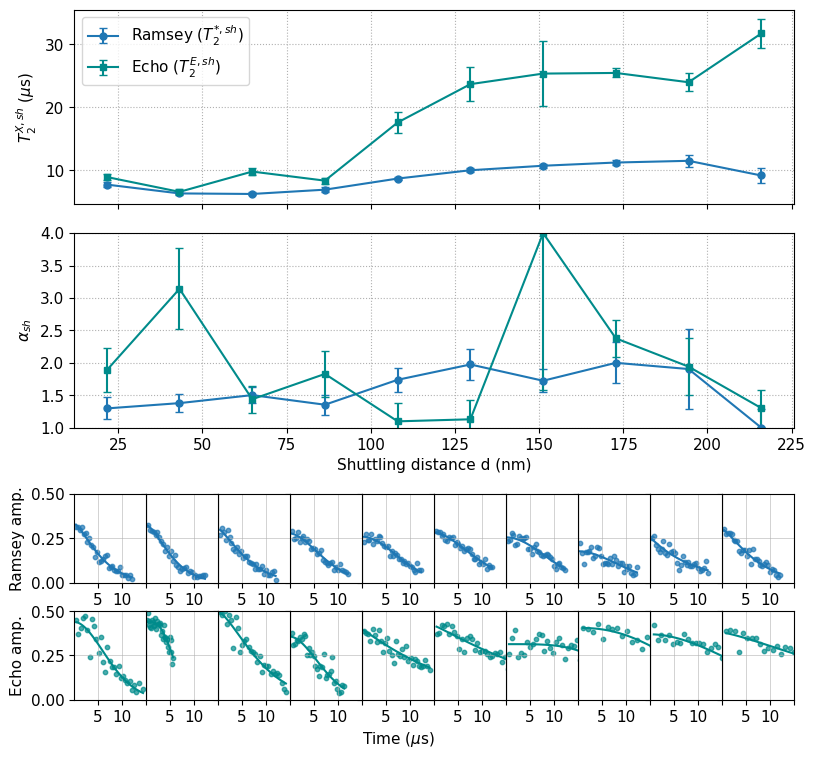

In [24]:
# Plot low field results
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def exp_decay(x, A, T, n):
    if T == 0: return np.zeros_like(x) + A
    with np.errstate(over='ignore'):
        term = np.clip(-(x / T)**n, -700, 700)
        return A * np.exp(term)

ramsey_color = "tab:blue"
echo_color = "darkcyan"

# Extract data from results
valid_ramsey = results_lowfield
valid_echo = results_lowfield_echo

r_cv_stops = [r['cv_stop'] for r in valid_ramsey]
r_T = [r['Decay time'] for r in valid_ramsey]
r_T_err = [r['Decay time_err'] for r in valid_ramsey]
r_n = [r['Exponent'] for r in valid_ramsey]
r_n_err = [r['Exponent_err'] for r in valid_ramsey]
r_dx = [r['dx'] for r in valid_ramsey]

e_cv_stops = [r['cv_stop'] for r in valid_echo]
e_T = [r['Decay time'] for r in valid_echo]
e_T_err = [r['Decay time_err'] for r in valid_echo]
e_n = [r['Exponent'] for r in valid_echo]
e_n_err = [r['Exponent_err'] for r in valid_echo]
e_dx = [r['dx'] for r in valid_echo]

r_T_us = np.array(r_T) / 1000.0
r_T_err_us = np.array(r_T_err) / 1000.0
e_T_us = np.array(e_T) / 1000.0
e_T_err_us = np.array(e_T_err) / 1000.0

N_cols = len(valid_echo)
nrows_logical = 5
height_ratios_logical = [2.2, 2.2, 0.1, 1, 1]

fig = plt.figure(figsize=(8, 7.5/6.5*6.5))
gs = gridspec.GridSpec(nrows_logical, N_cols, figure=fig,
                       height_ratios=height_ratios_logical,
                       hspace=0.25, wspace=0.0)

# Row 1: Decay Times
ax1 = fig.add_subplot(gs[0, :])
ax1.errorbar(r_dx, r_T_us, yerr=r_T_err_us, fmt='o-', label='Ramsey ($T_2^{*,sh}$)', 
             capsize=3, markersize=5, color=ramsey_color)
ax1.errorbar(e_dx, e_T_us, yerr=e_T_err_us, fmt='s-', label='Echo ($T_2^{E,sh}$)', 
             capsize=3, markersize=5, color=echo_color)
ax1.set_ylabel(r'$T_{2}^{X,sh}$ ($\mu$s)')
ax1.legend()
ax1.grid(True, linestyle=':')
ax1.tick_params(labelbottom=False)

# Row 2: Exponents
ax2 = fig.add_subplot(gs[1, :], sharex=ax1)
ax2.errorbar(r_dx, r_n, yerr=r_n_err, fmt='o-', label='Ramsey', capsize=3, 
             markersize=5, color=ramsey_color)
ax2.errorbar(e_dx, e_n, yerr=e_n_err, fmt='s-', label='Echo', capsize=3, 
             markersize=5, color=echo_color)
ax2.set_xlabel('Shuttling distance d (nm)')
ax2.set_ylabel(r'$\alpha_{sh}$')
ax2.grid(True, linestyle=':')
ax2.set_ylim(1, 4)

# Individual decay plots
for i in range(N_cols):
    col = len(valid_echo) - i - 1
    current_cv_stop = e_cv_stops[i]

    r_data = valid_ramsey[i-1] if i-1 < len(valid_ramsey) else None
    e_data = valid_echo[i] if i < len(valid_echo) else None
    
    # Ramsey plot
    ax_r = fig.add_subplot(gs[3, col])
    if i == N_cols-1:
        ax_r.set_ylabel('Ramsey amp.')
        ax_r.set_xticklabels([])
    else:
        ax_r.set_yticklabels([])
    
    if r_data and len(r_data.get('x_data', [])) > 0:
        ramsey_time_us = np.array(r_data['x_data']) / 1000.0
        ax_r.scatter(ramsey_time_us, r_data['amplitudes'], label='Data', s=10, 
                    alpha=0.7, color=ramsey_color)
        if r_data.get('fit_params') is not None and not np.any(np.isnan(r_data['fit_params'])):
            fit_x_ns = np.linspace(min(r_data['x_data']), max(r_data['x_data']), 100)
            fit_y = exp_decay(fit_x_ns, *r_data['fit_params'])
            ax_r.plot(fit_x_ns / 1000.0, fit_y, '-', 
                     label=f'Fit T={r_data["Decay time"]:.1f}, n={r_data["Exponent"]:.2f}', 
                     color=ramsey_color)
    
    ax_r.set_ylim(0, 0.5)
    ax_r.set_xlim(left=0)
    ax_r.set_xticks([5, 10])
    ax_r.grid(True, linestyle='-', lw=0.4)
    
    # Echo plot
    ax_e = fig.add_subplot(gs[4, col], sharex=ax_r)
    if i == N_cols-1:
        ax_e.set_ylabel('Echo amp.')
    else:
        ax_e.set_yticklabels([])
    
    if i == N_cols//2:
        ax_e.set_xlabel('Time ($\mu$s)')
    
    if e_data and len(e_data.get('x_data', [])) > 0:
        echo_time_us = np.array(e_data['x_data']) / 1000.0
        ax_e.scatter(echo_time_us, e_data['amplitudes'], label='Data', s=10, 
                    alpha=0.7, color=echo_color)
        if e_data.get('fit_params') is not None and not np.any(np.isnan(e_data['fit_params'])):
            fit_x_ns = np.linspace(min(e_data['x_data']), max(e_data['x_data']), 100)
            fit_y = exp_decay(fit_x_ns, *e_data['fit_params'])
            ax_e.plot(fit_x_ns / 1000.0, fit_y, '-', 
                     label=f'Fit T={e_data["Decay time"]:.1f}, n={e_data["Exponent"]:.2f}', 
                     color=echo_color)
    
    ax_e.set_xticklabels([5, 10])
    ax_e.set_ylim(0, 0.5)
    ax_e.set_xlim(left=0)
    ax_e.set_xticks([5, 10,15])
    ax_e.grid(True, linestyle='-', lw=0.4)

plt.subplots_adjust(top=0.99, right=0.98, bottom=0.07, left=0.08)
plt.savefig(f"{figure_path}/app_shuttlingdata_low_field.pdf")
plt.show()
